<a href="https://colab.research.google.com/github/hongsonthan110/sonnic.github.io/blob/main/VEF_Academy_ML2021_Demo_Linear_Regression_and_Logistics_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt  # Matlab-style plotting
# Make sure plot shows immediately
%matplotlib inline 

import seaborn as sns # Library for plotting
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats # Library for scientific computation
from scipy.stats import norm, skew # For some statistics

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report, roc_auc_score, plot_roc_curve

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 182 kB/s 
     |████████████████████████████████| 76 kB 5.0 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [ ]:
import sweetviz as sv

# 1. Linear Regression

In [ ]:
"""
Read data from CSV file and calculate some statistic.
The outcome/label/dependent variable is SalePrice.
The others are features/independent variable.
"""

TRAIN = 'https://github.com/SrikanthVelpuri/House-Prices-Advanced-Regression-Techniques/raw/master/train.csv'

## TASK ###
"""
Replace `pass` with your code
* Read the csv in link `train` using pandas and assign to variable `df`
* Drop the columns `Id`
* Print the dimension of data
* Print some Desciptive statistics of data
"""

df = pd.read_csv(TRAIN)
df = df.drop(columns=['Id'])
print(df.shape)
df.describe()

## TASK ###

(1460, 80)


MSSubClass  LotFrontage  ...       YrSold      SalePrice
count  1460.000000  1201.000000  ...  1460.000000    1460.000000
mean     56.897260    70.049958  ...  2007.815753  180921.195890
std      42.300571    24.284752  ...     1.328095   79442.502883
min      20.000000    21.000000  ...  2006.000000   34900.000000
25%      20.000000    59.000000  ...  2007.000000  129975.000000
50%      50.000000    69.000000  ...  2008.000000  163000.000000
75%      70.000000    80.000000  ...  2009.000000  214000.000000
max     190.000000   313.000000  ...  2010.000000  755000.000000

[8 rows x 37 columns]

## 1.1. Exploratory data analysis

                                             |          | [  0%]   00:00 -> (? left)


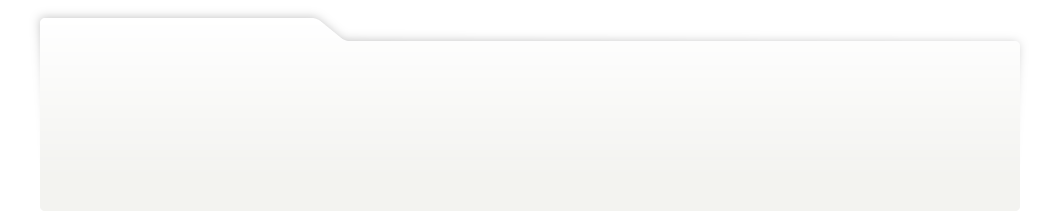
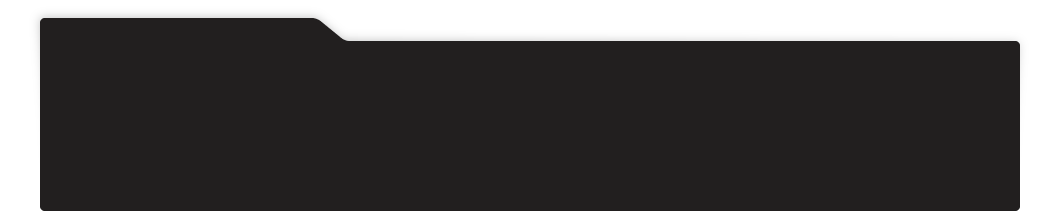
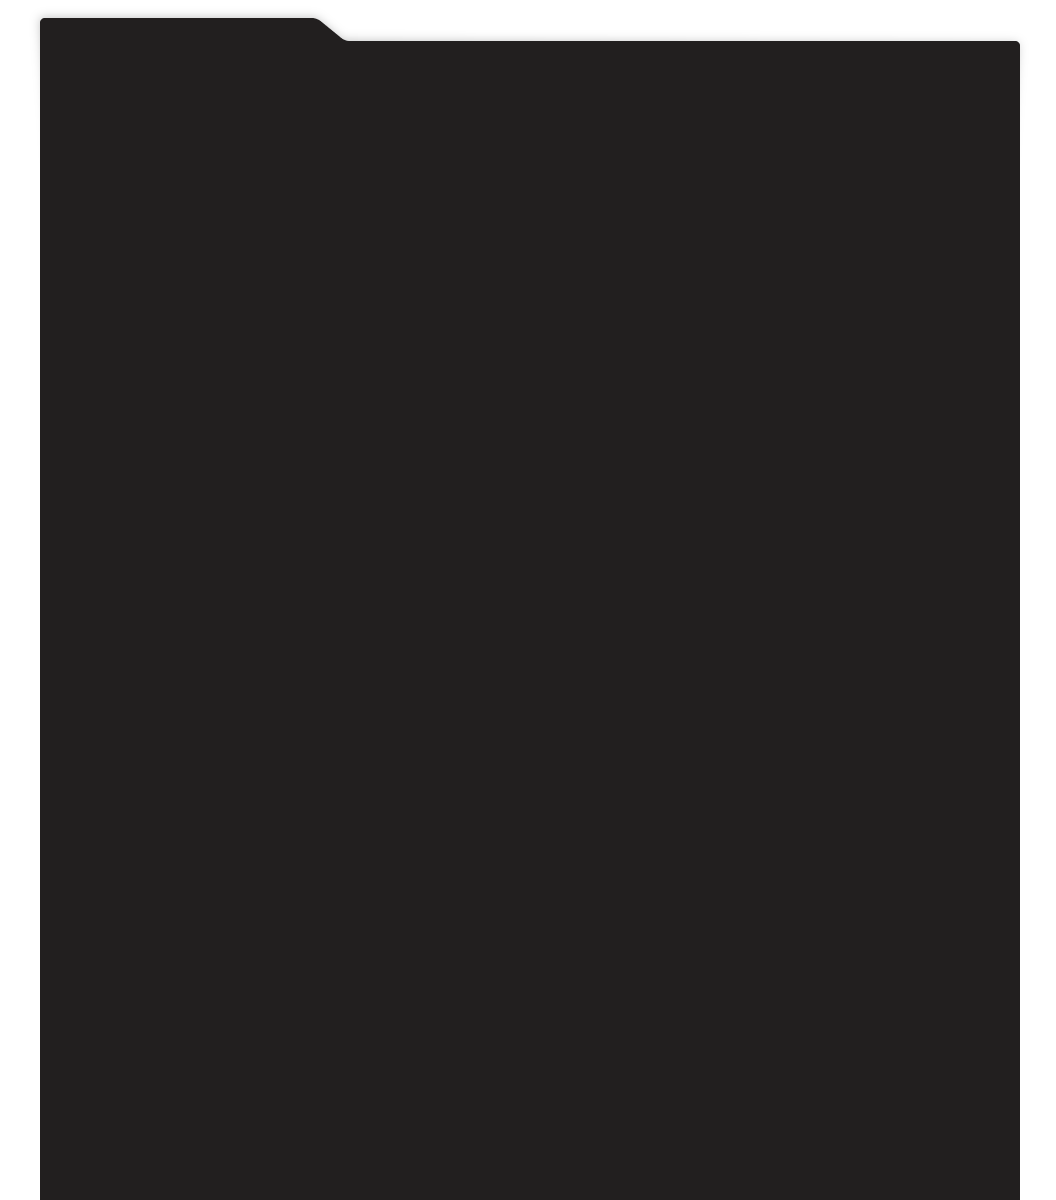
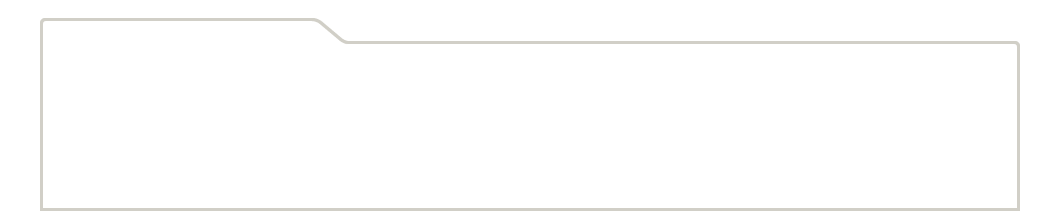
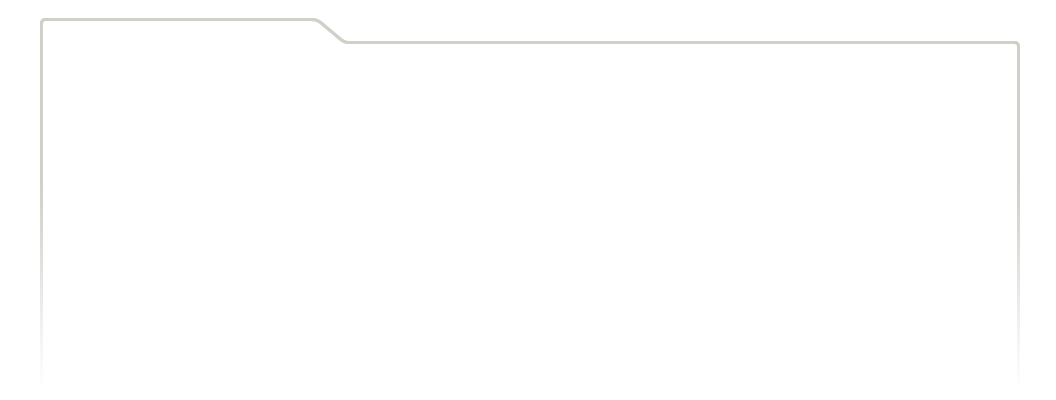
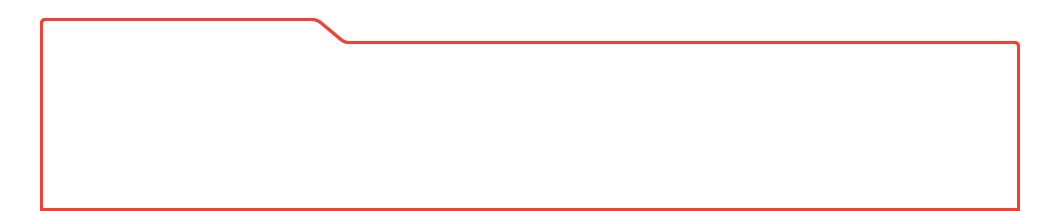
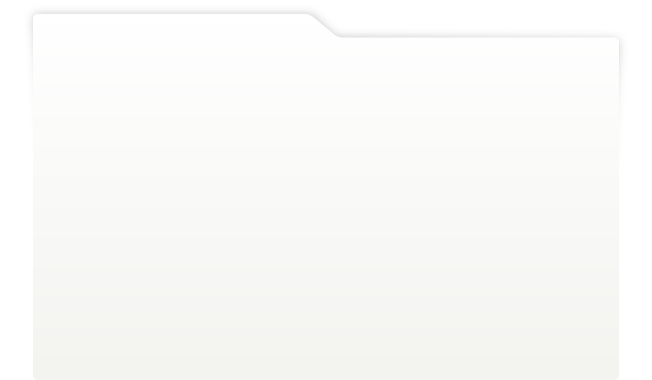
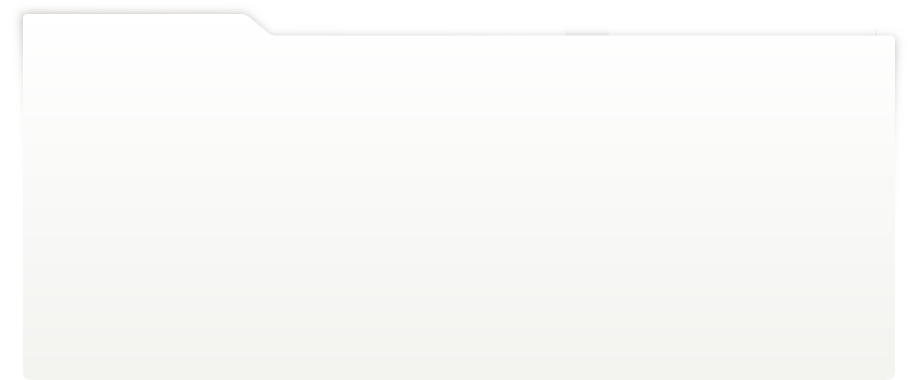
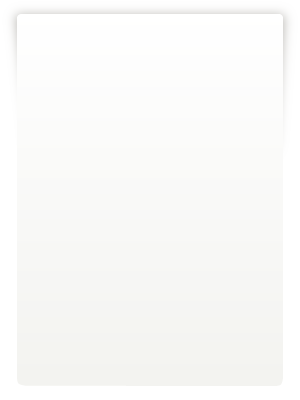
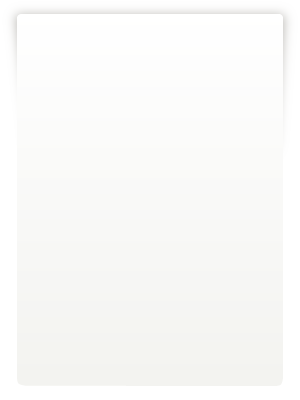
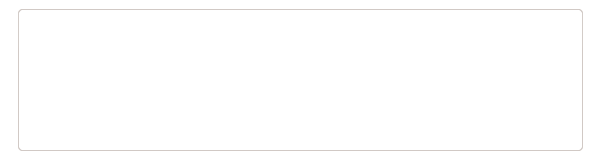
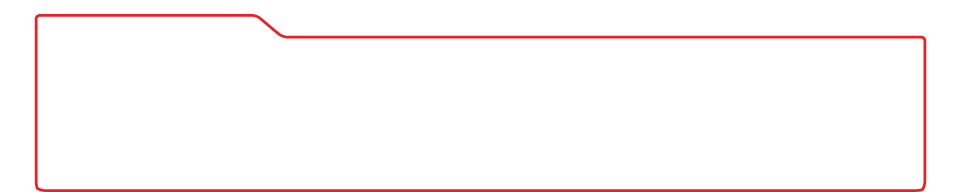
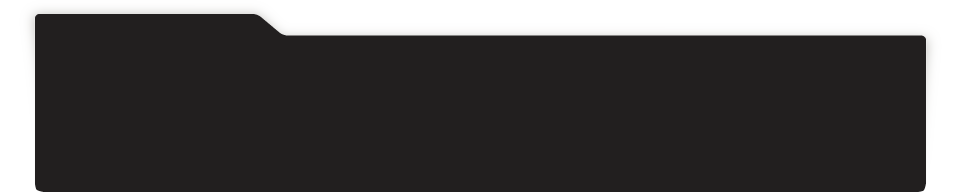
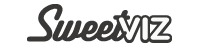
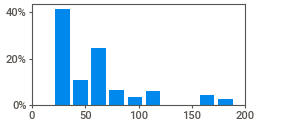
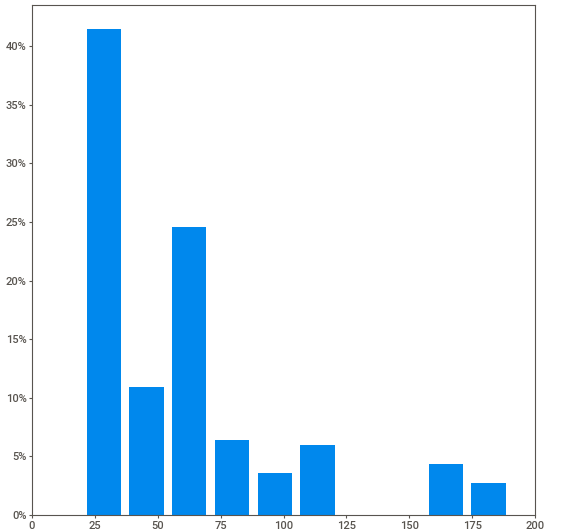
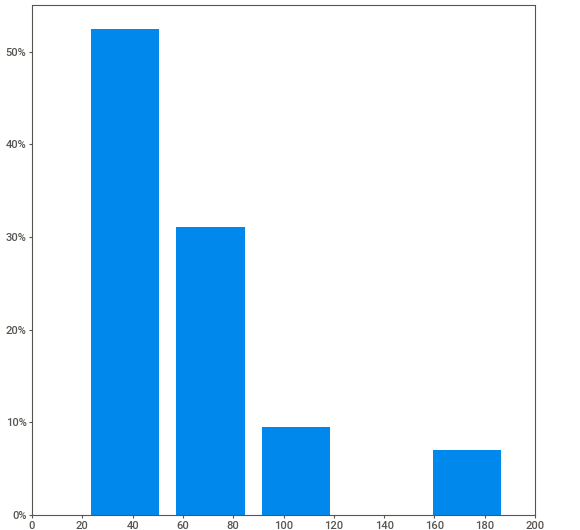
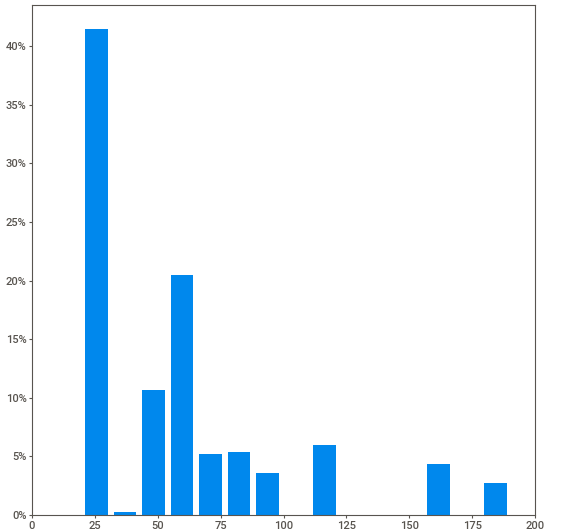
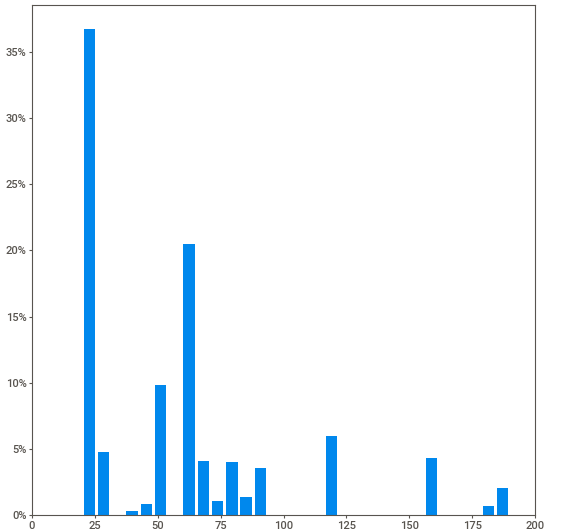
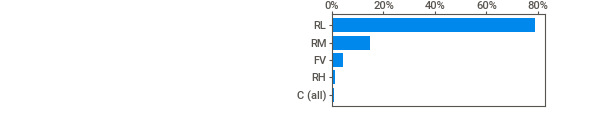
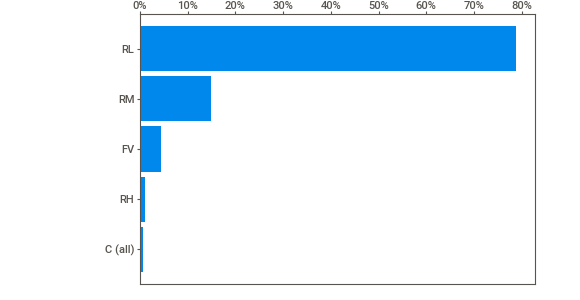
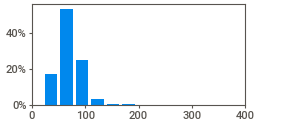
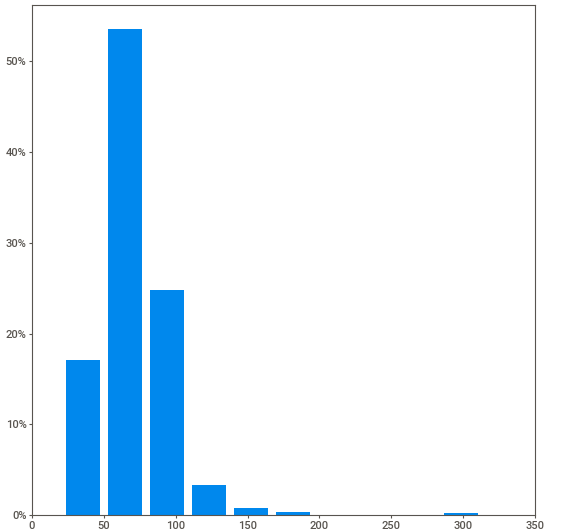
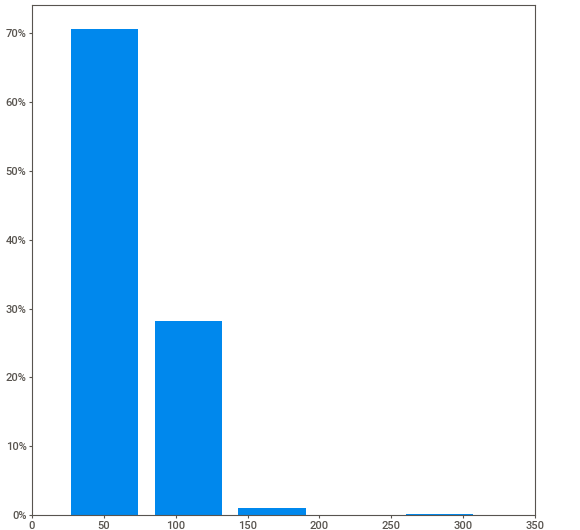
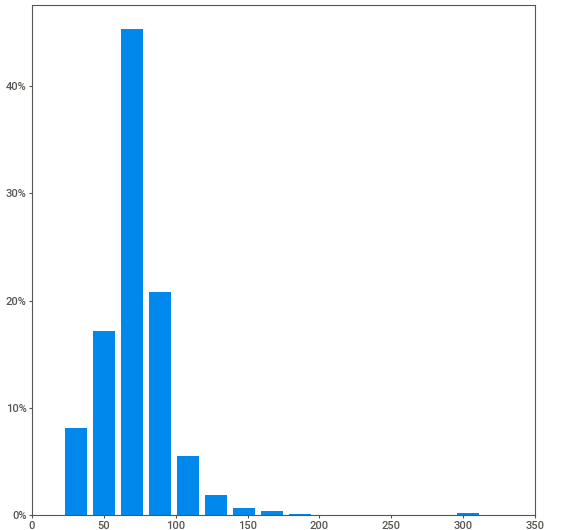
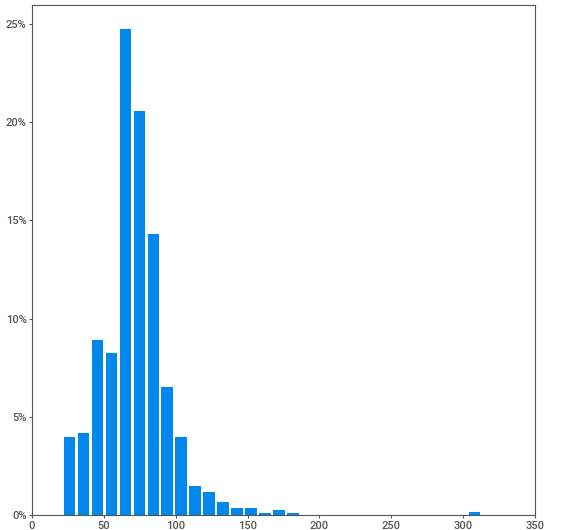
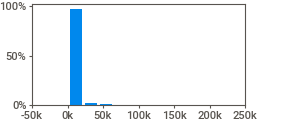
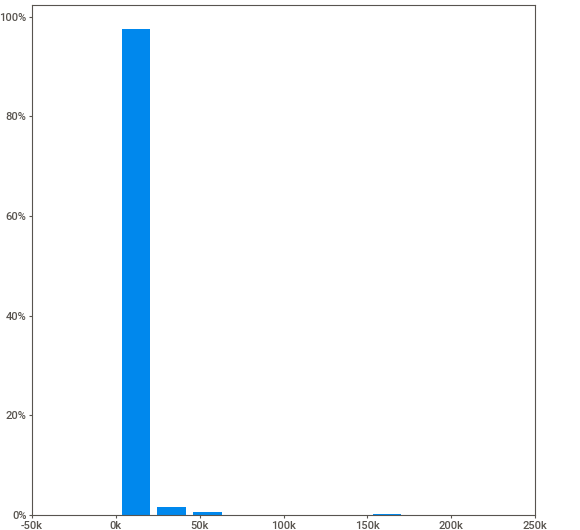
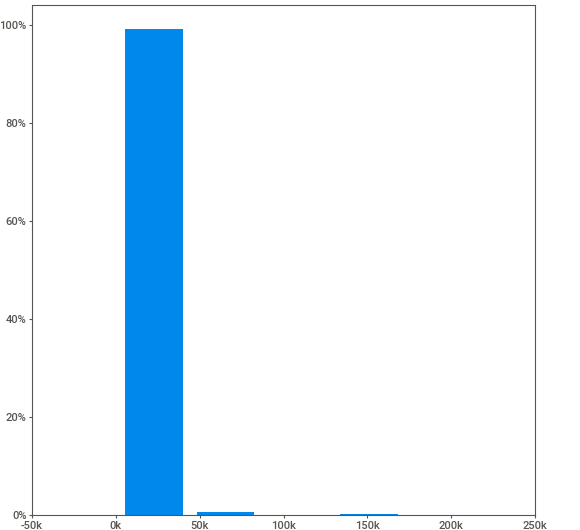
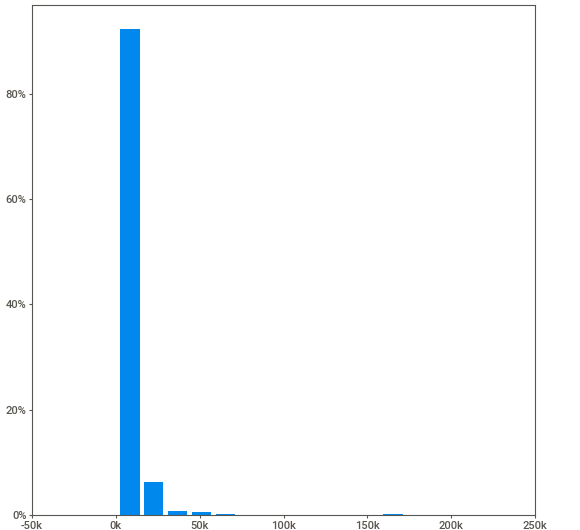
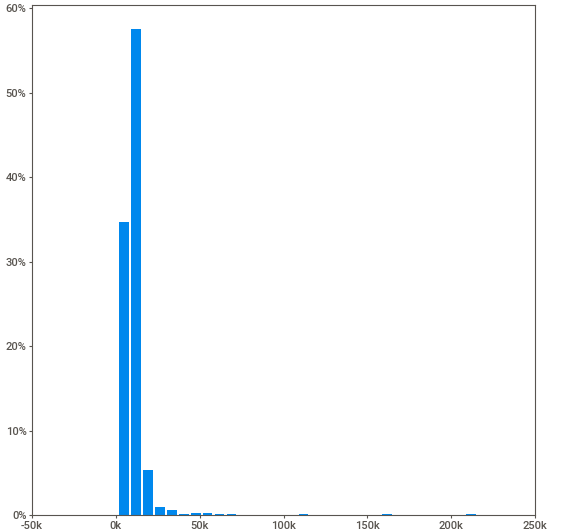
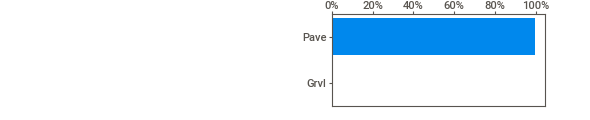
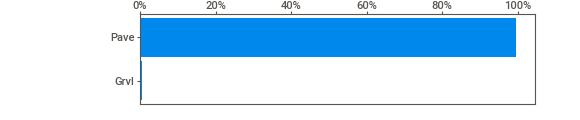
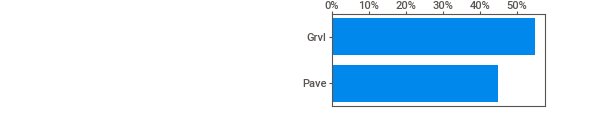
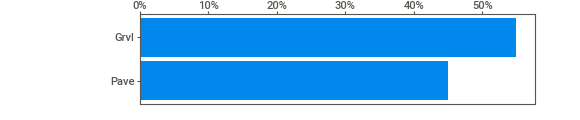
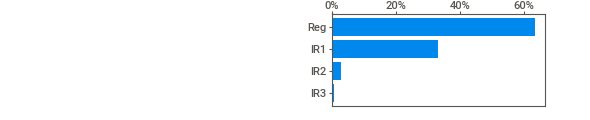
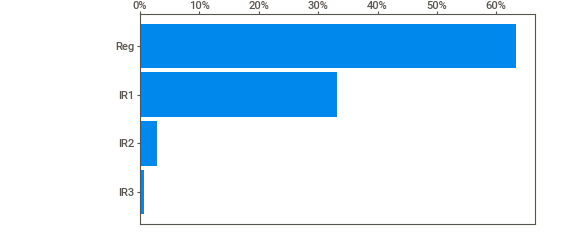
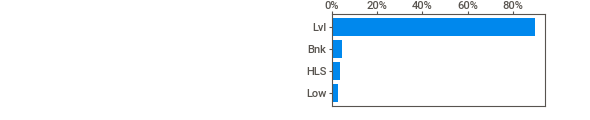
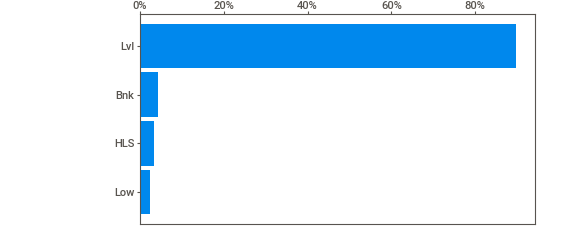
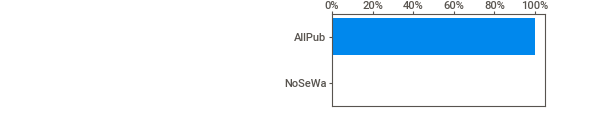
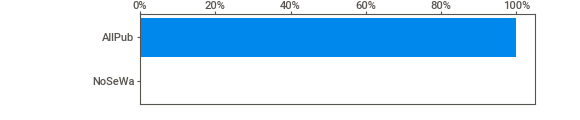
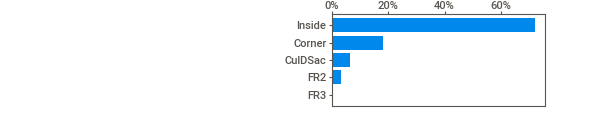
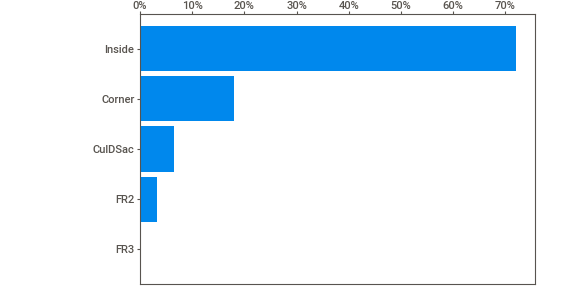
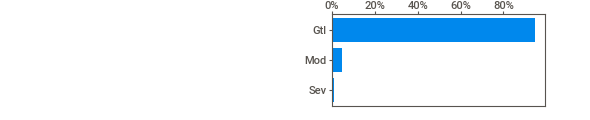
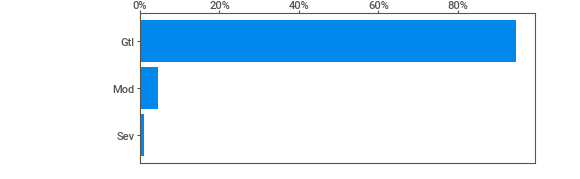
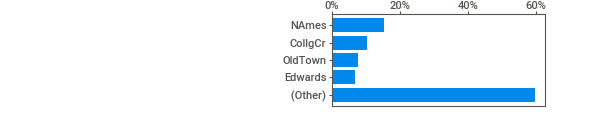
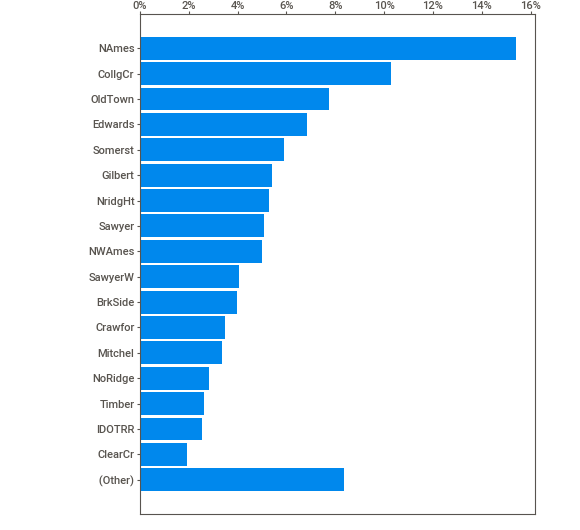
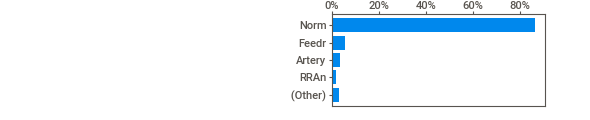
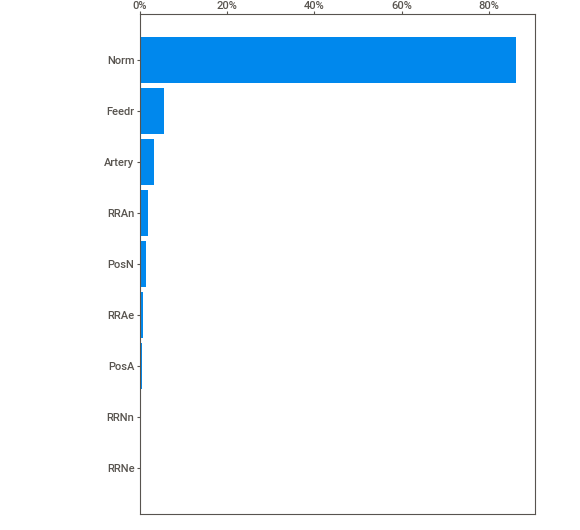
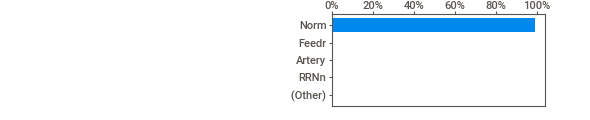
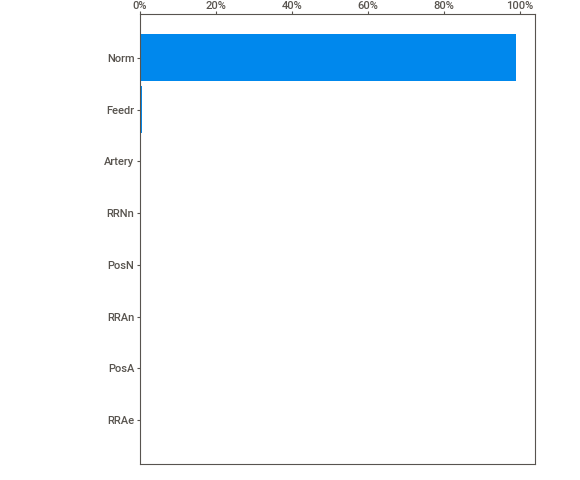
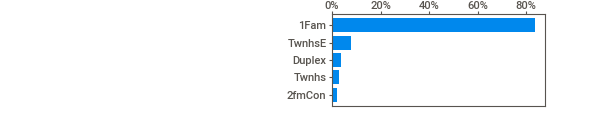
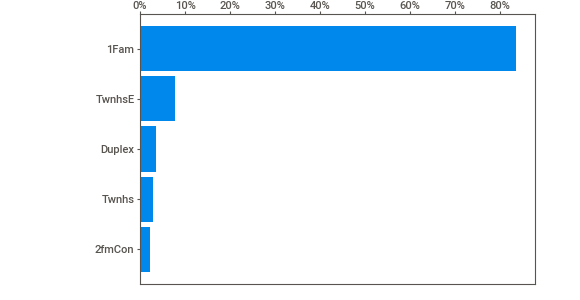
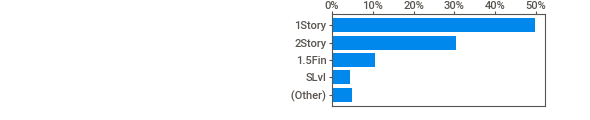
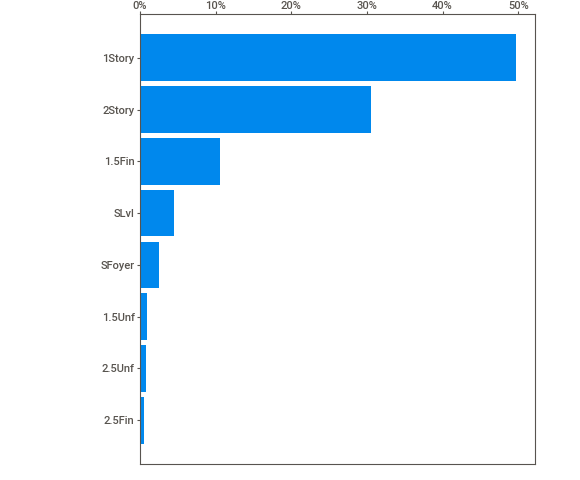
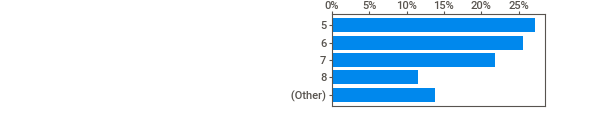
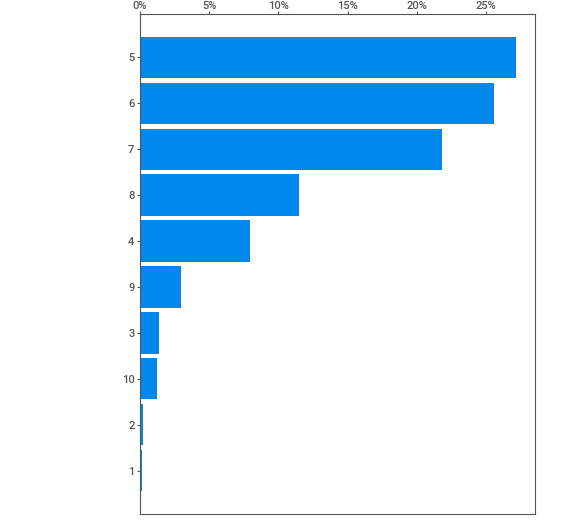
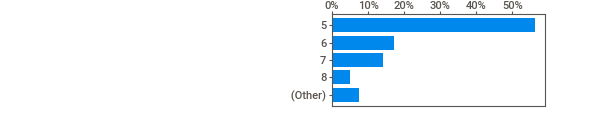
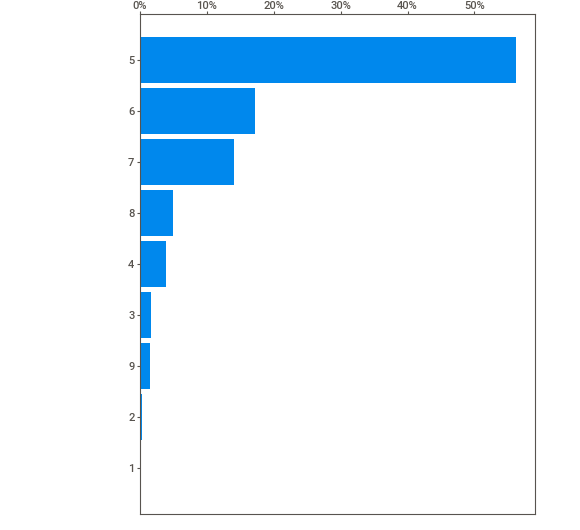
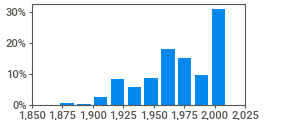
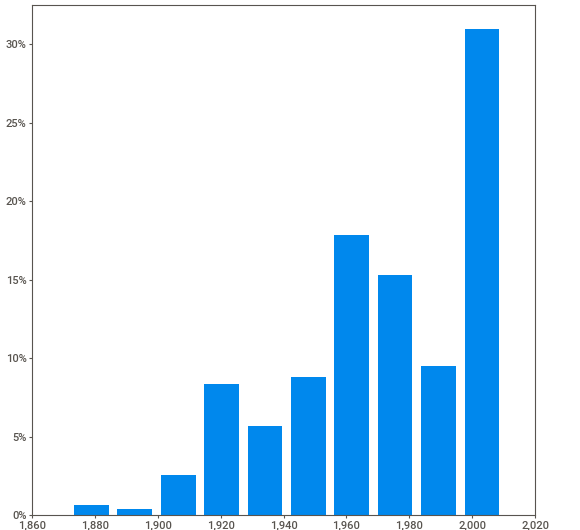
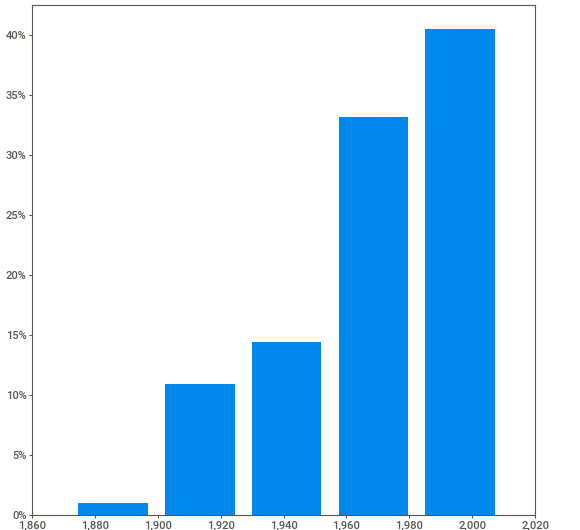
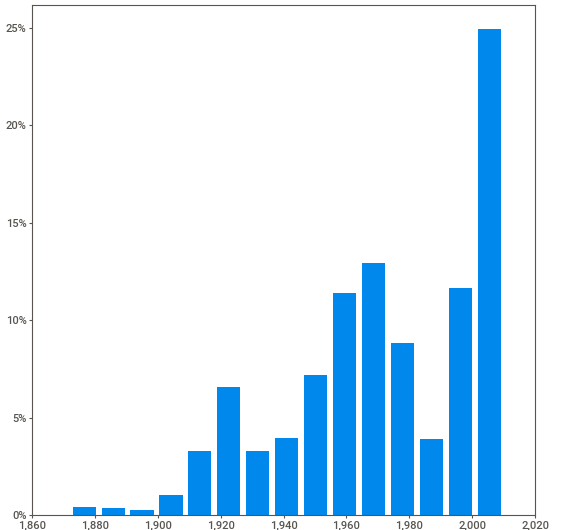
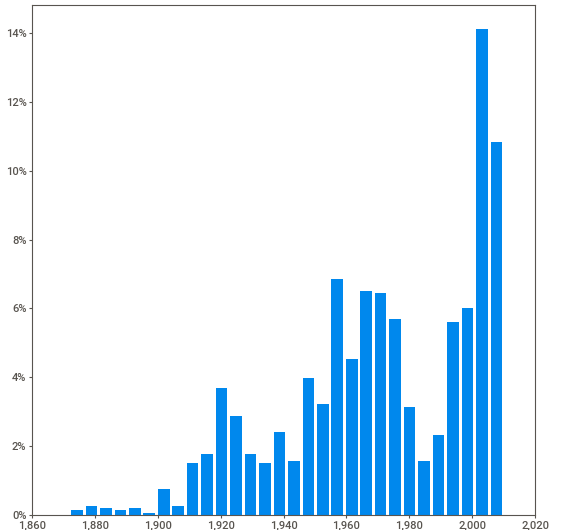
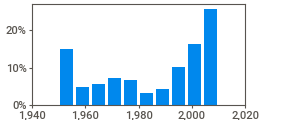
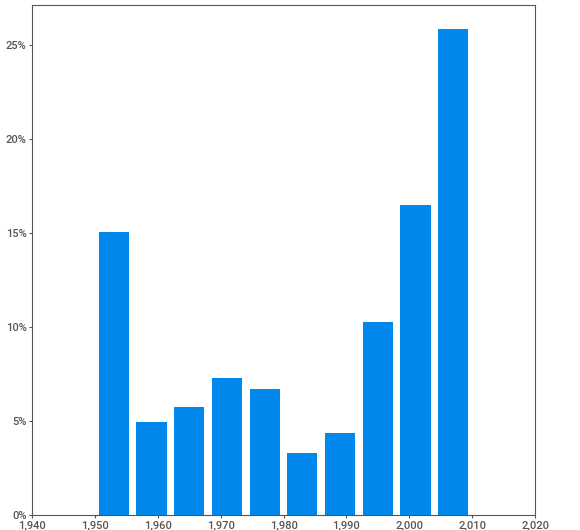
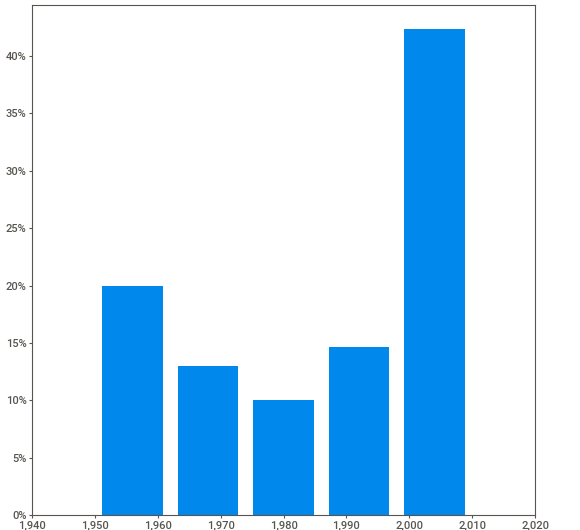
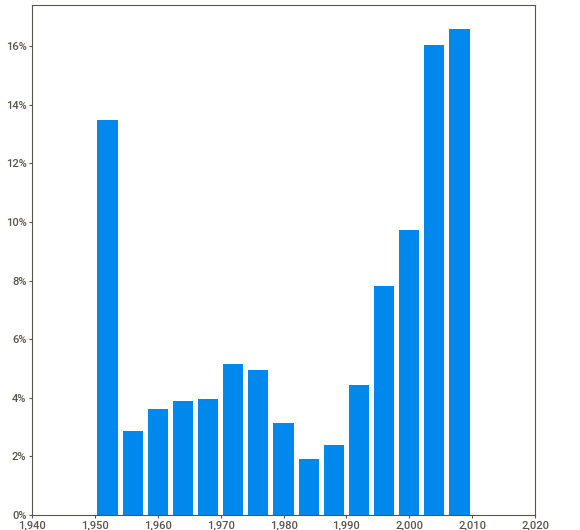
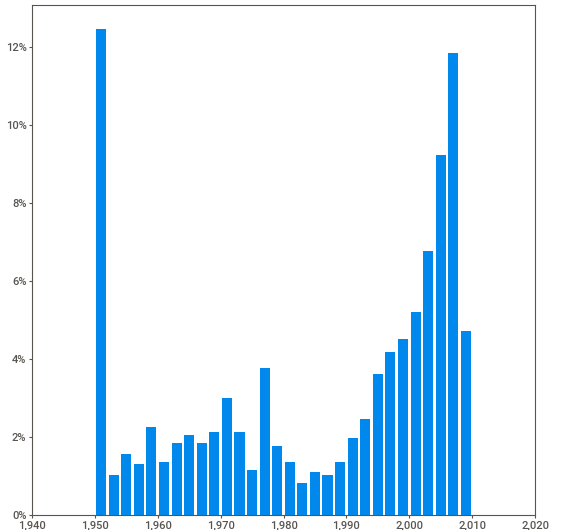
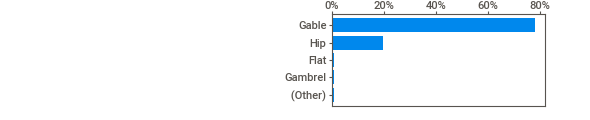
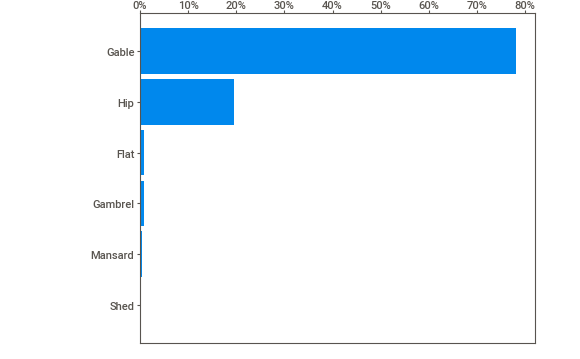
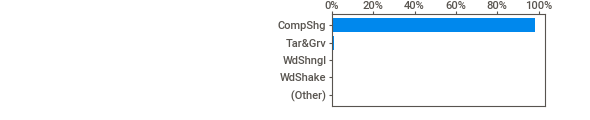
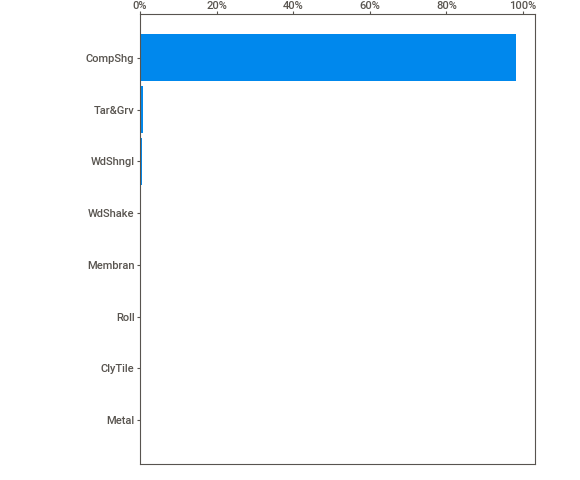
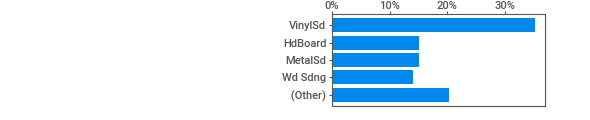
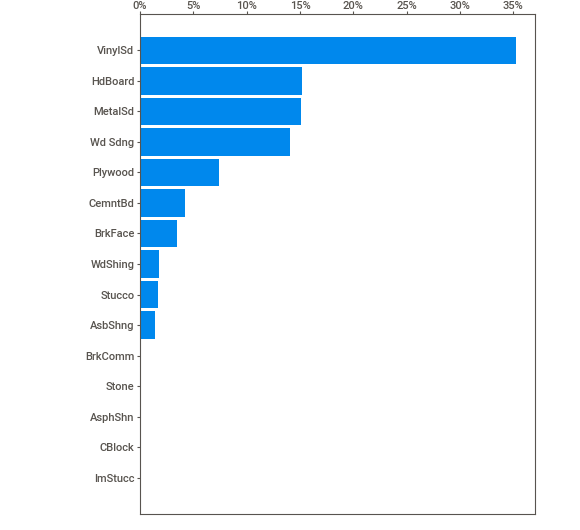
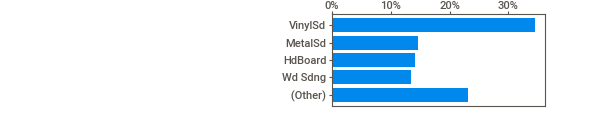
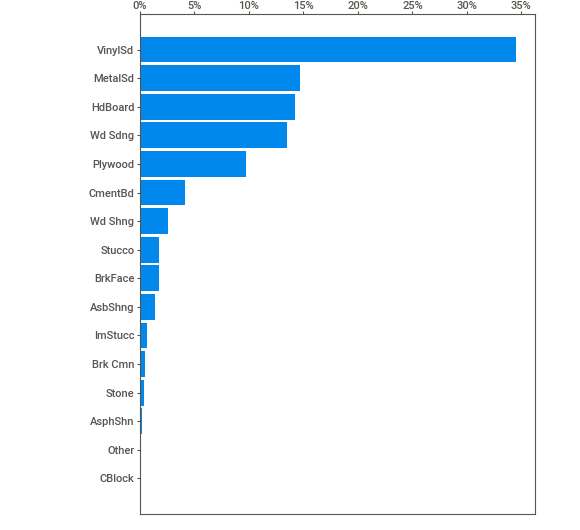
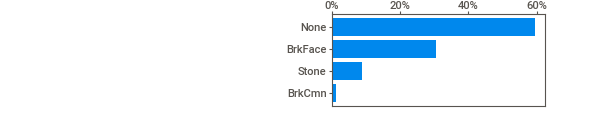
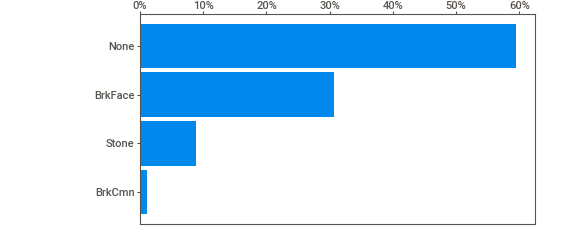
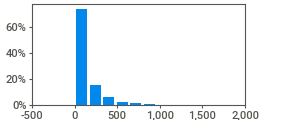
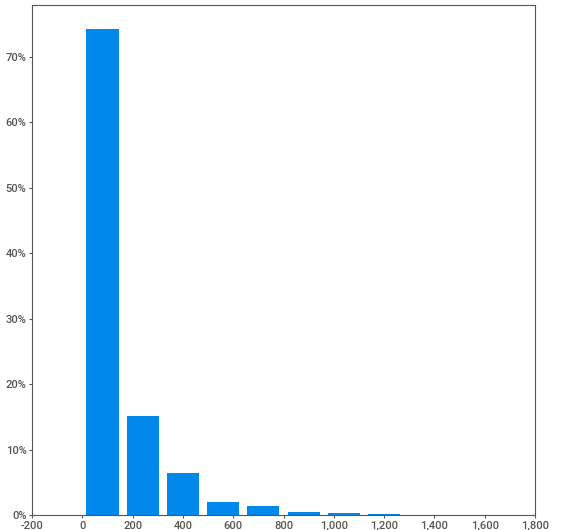
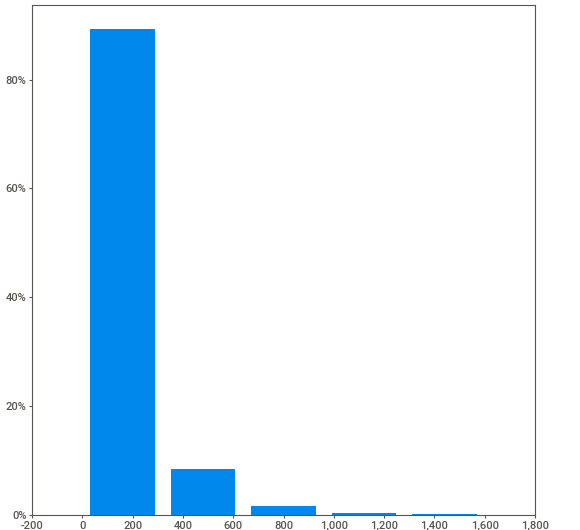
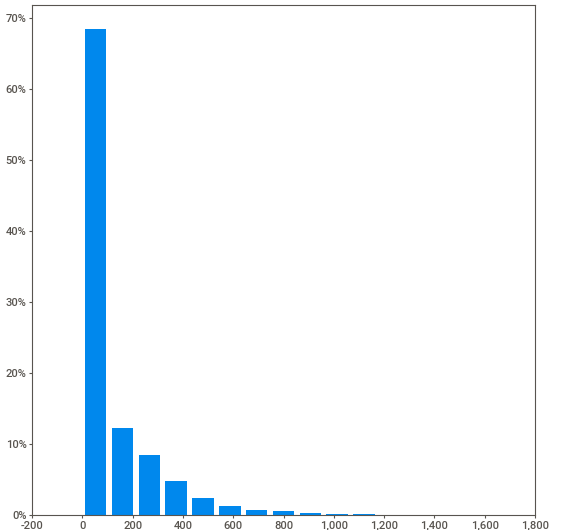
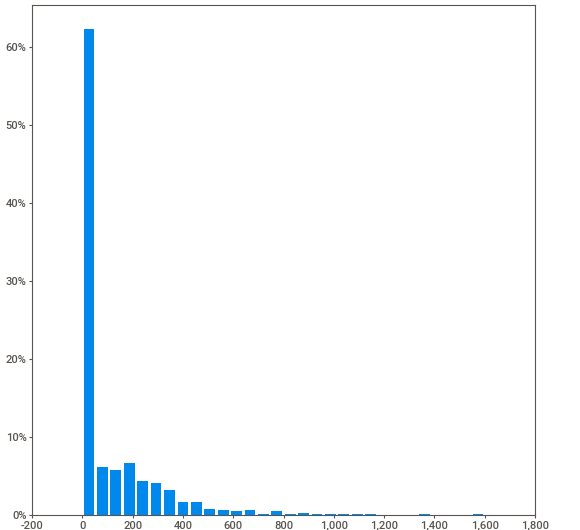
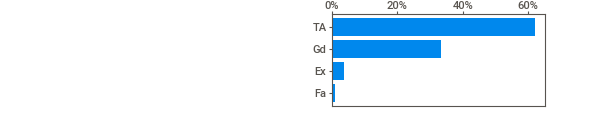
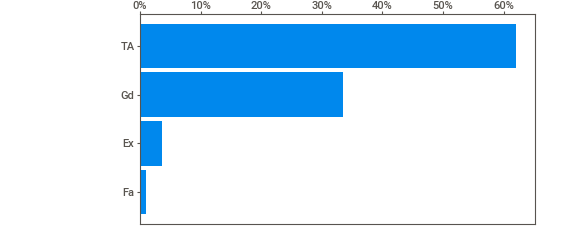
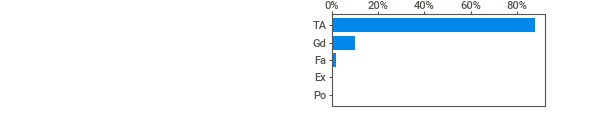
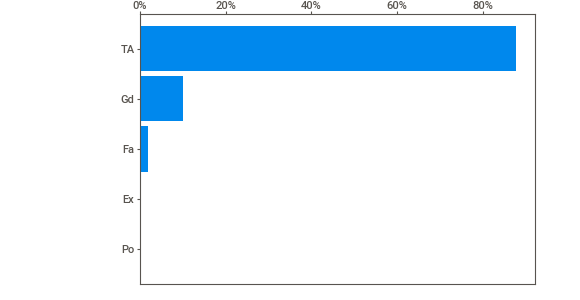
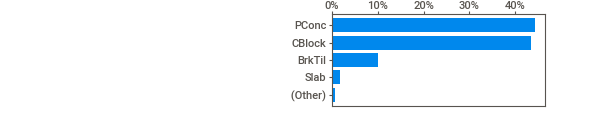
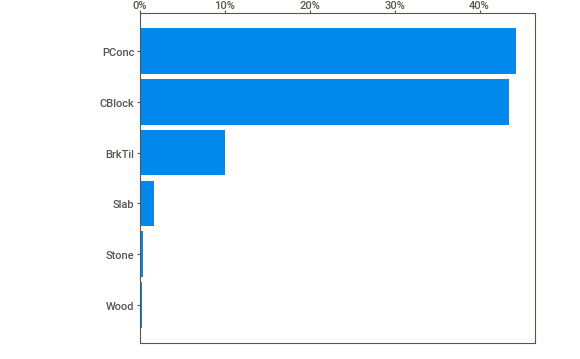
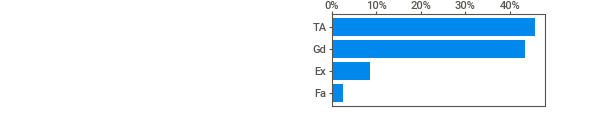
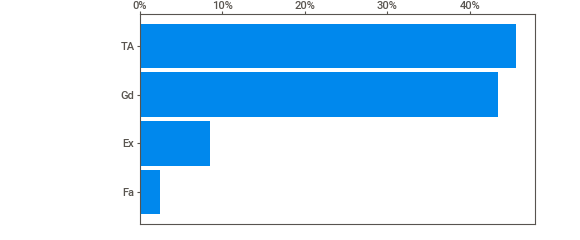
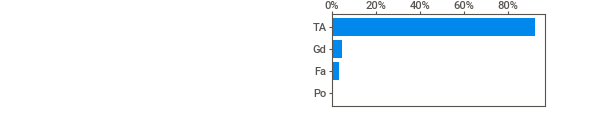
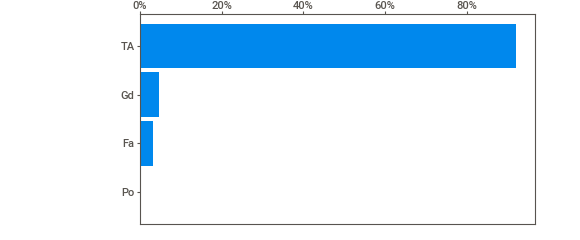
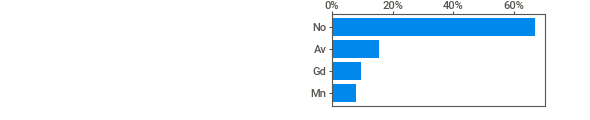
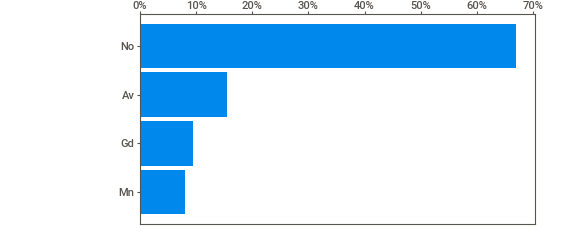
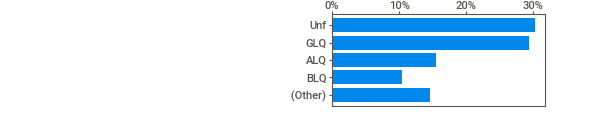
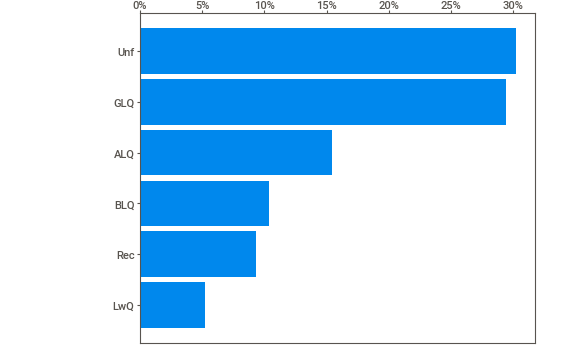
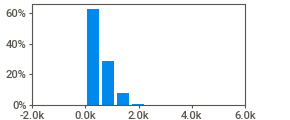
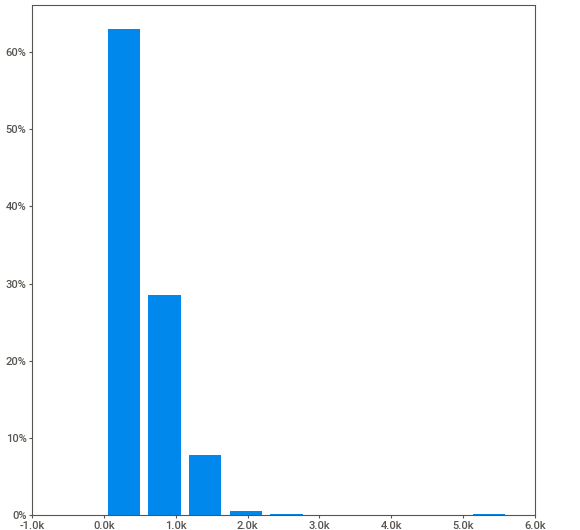
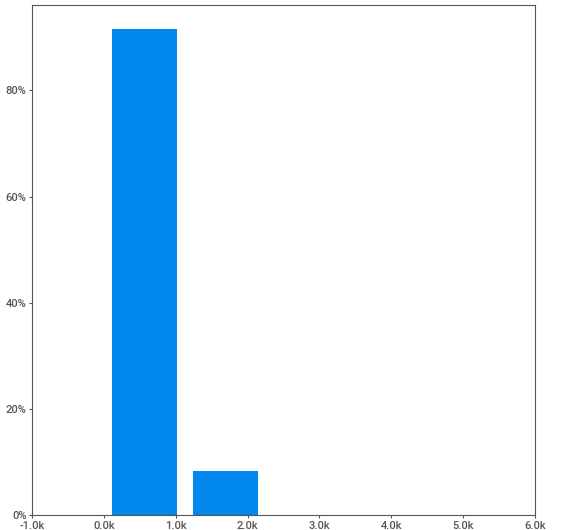
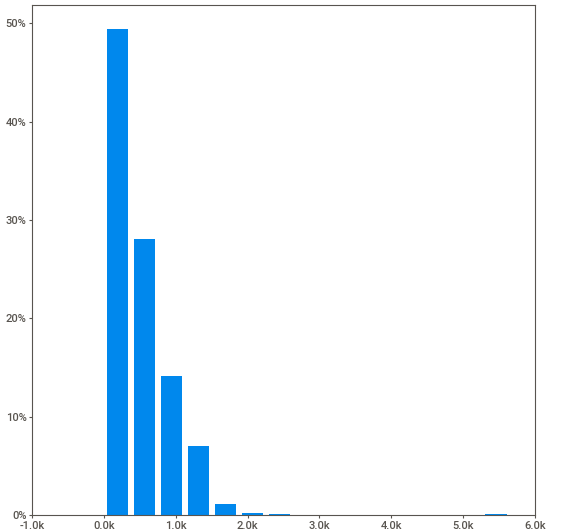
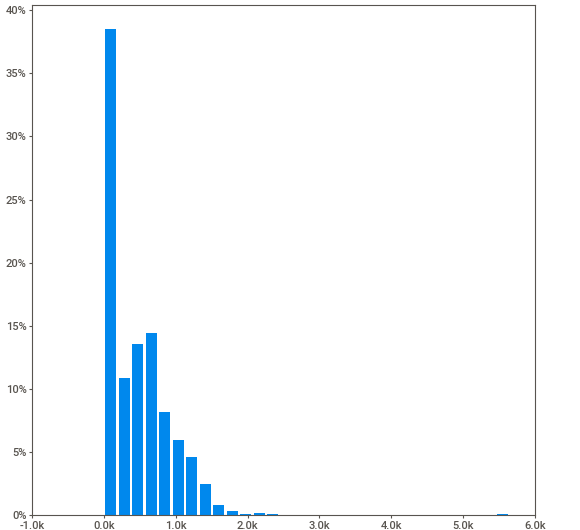
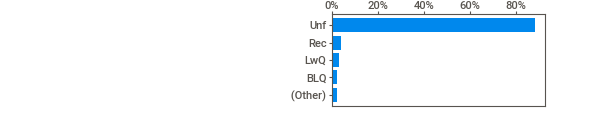
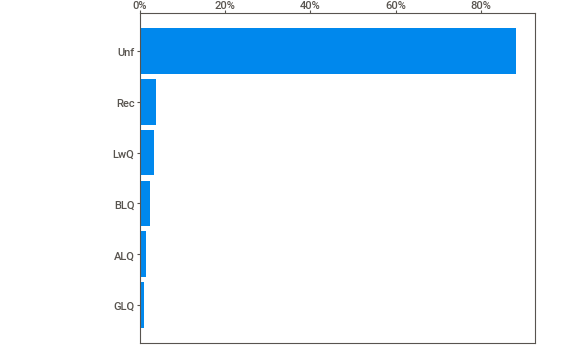
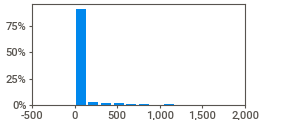
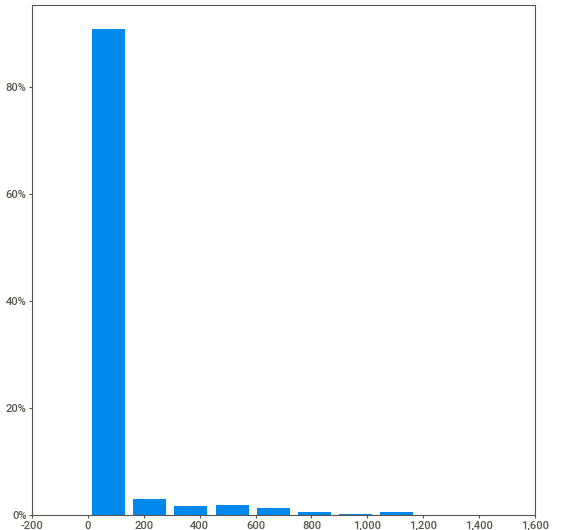
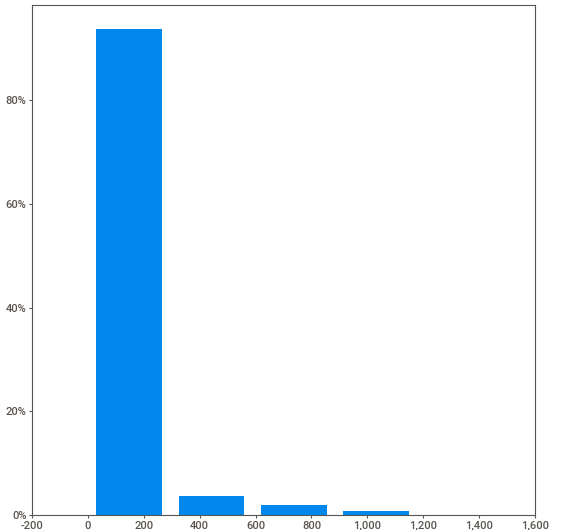
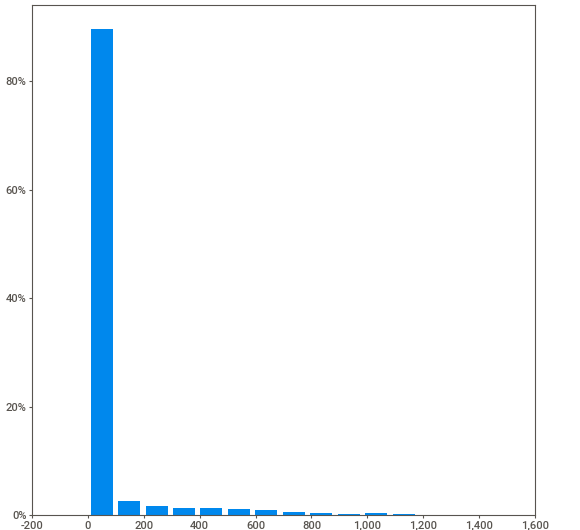
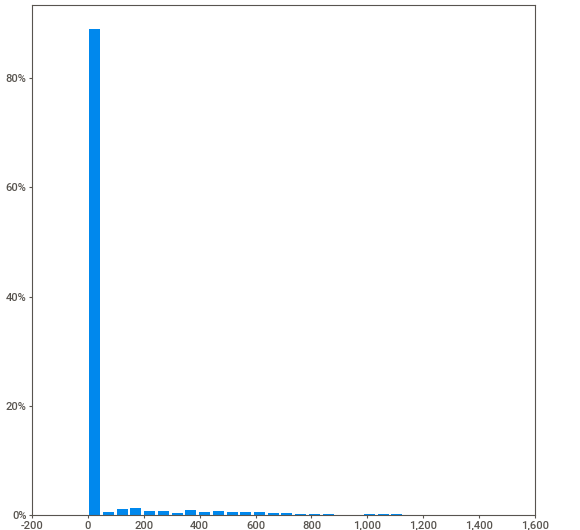
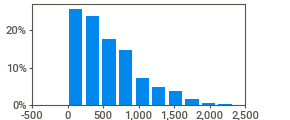
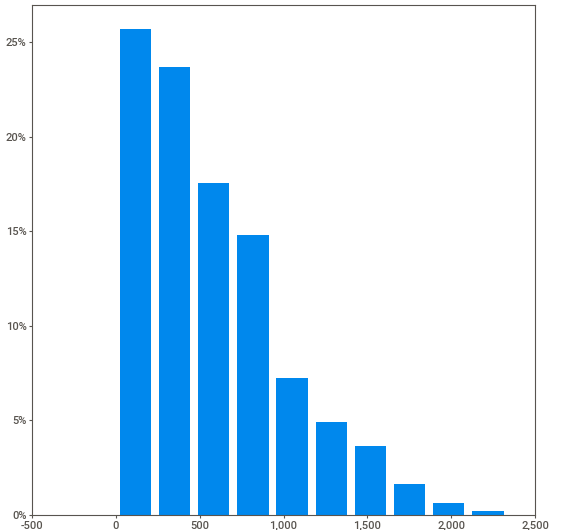
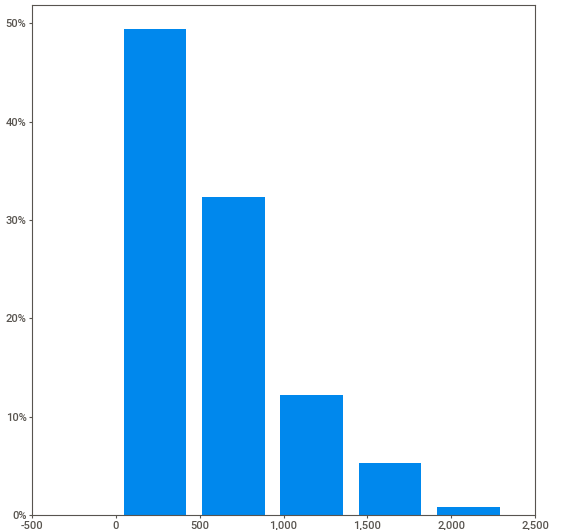
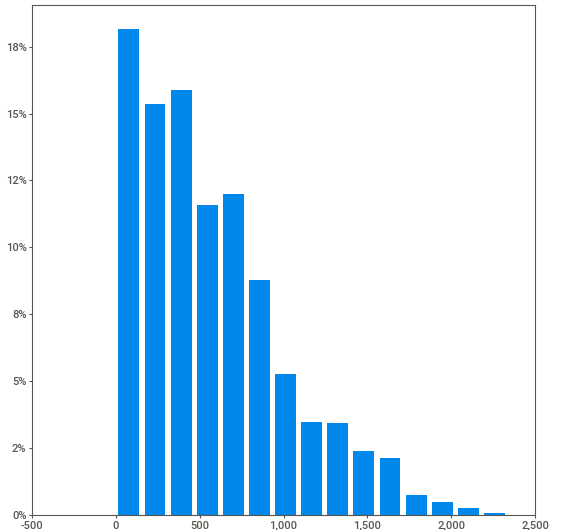
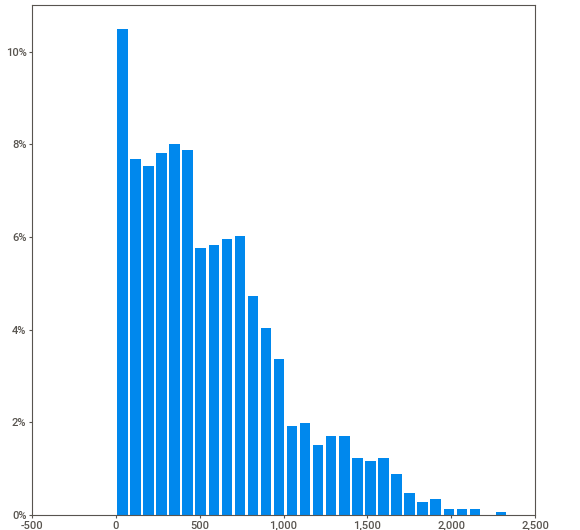
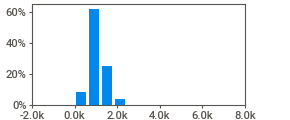
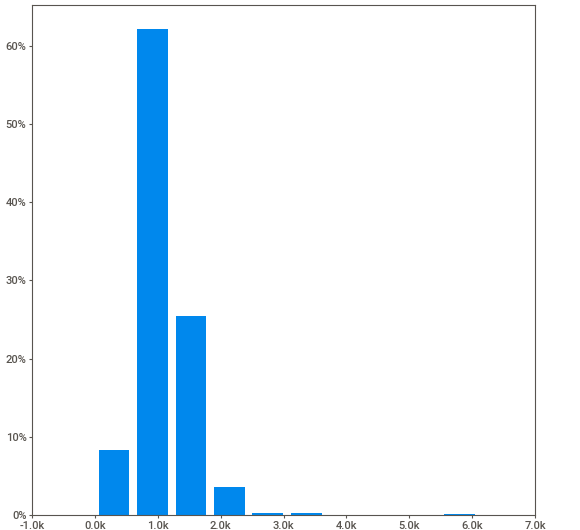
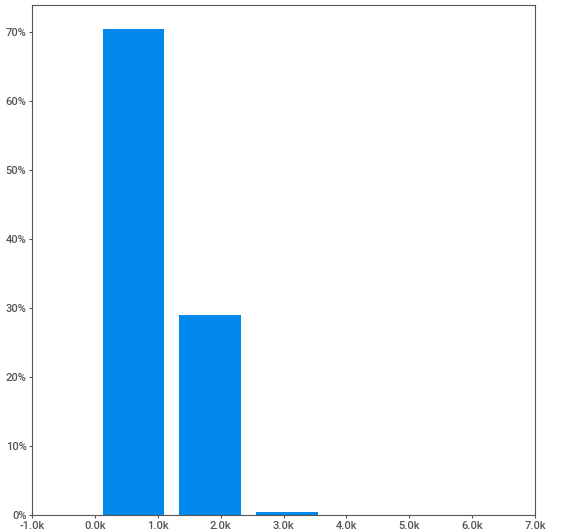
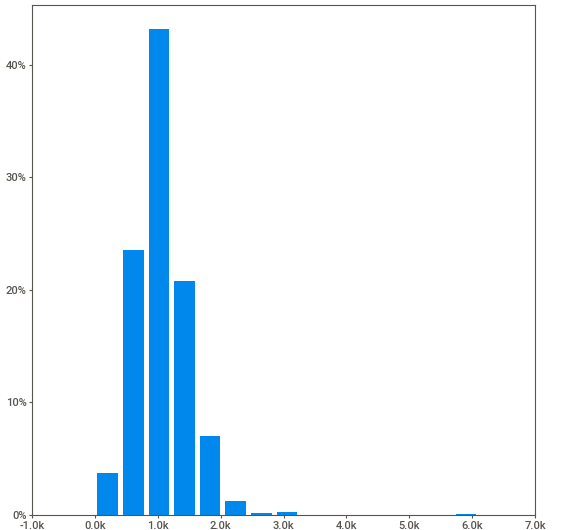
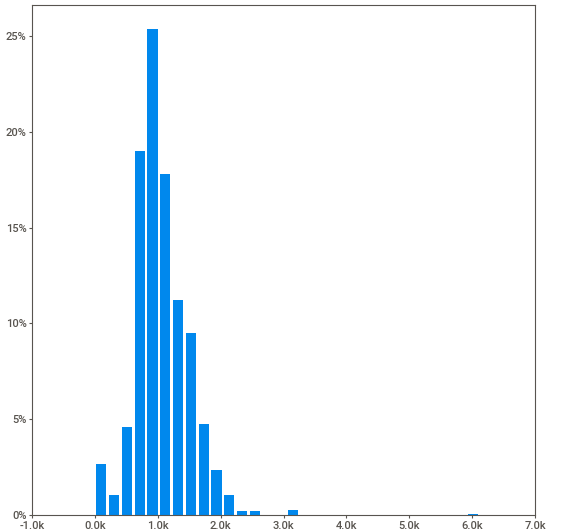
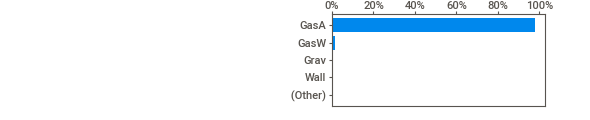
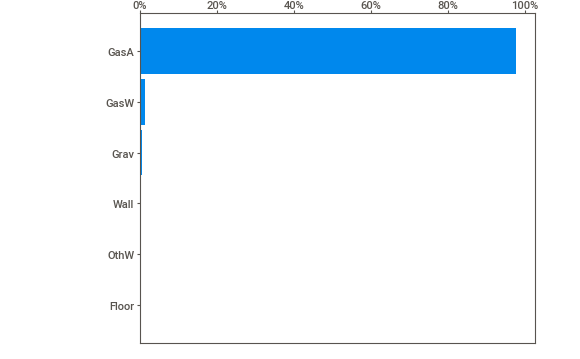
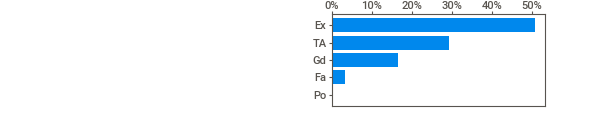
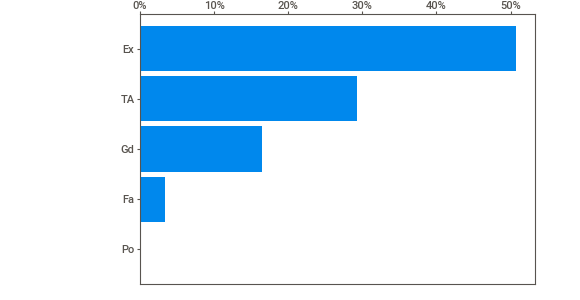
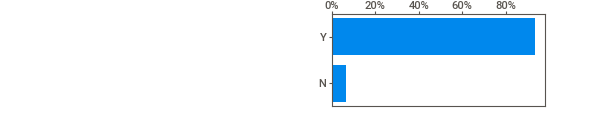
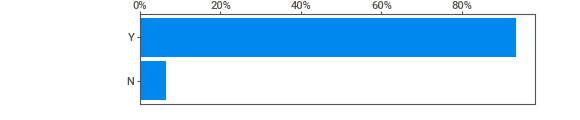
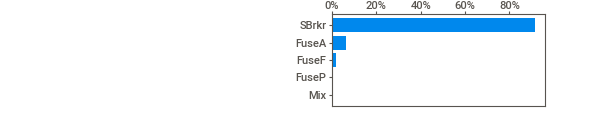
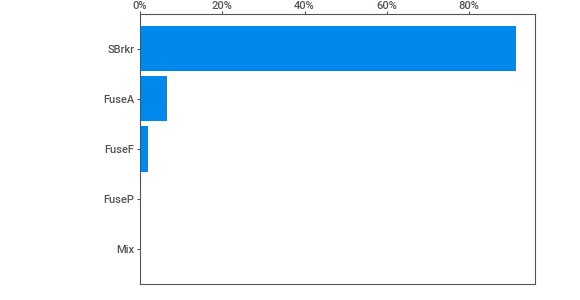
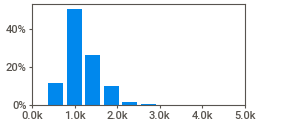
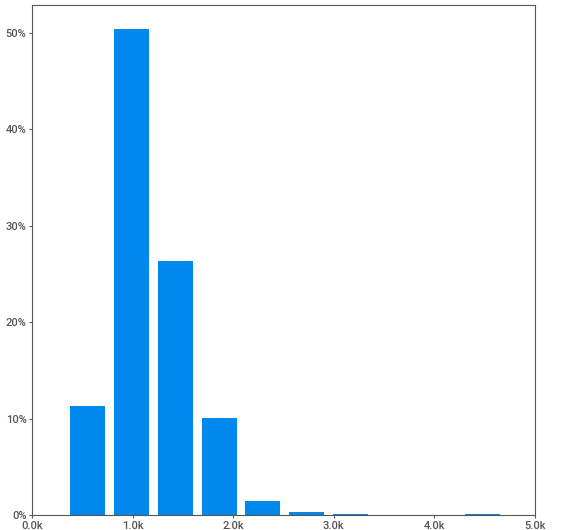
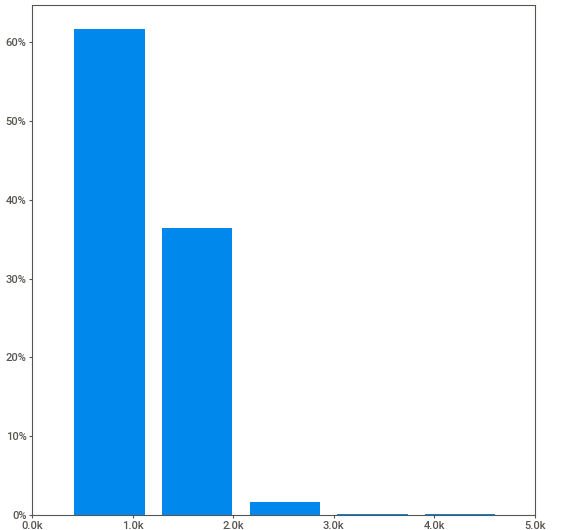
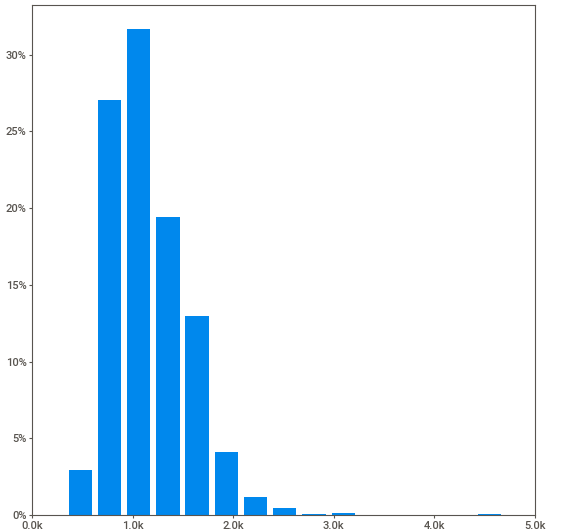
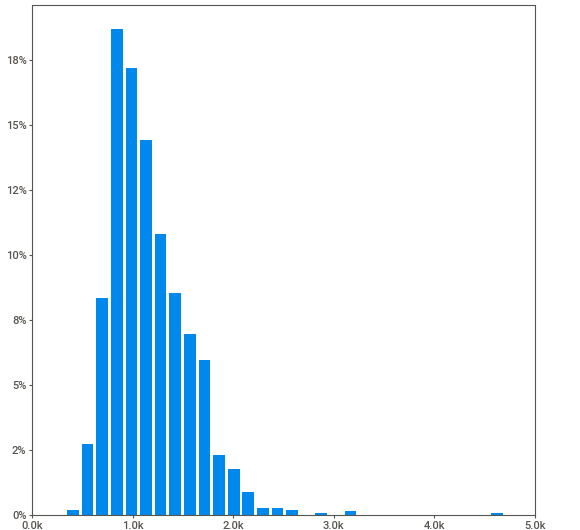
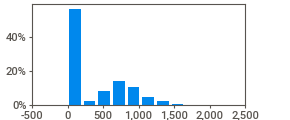
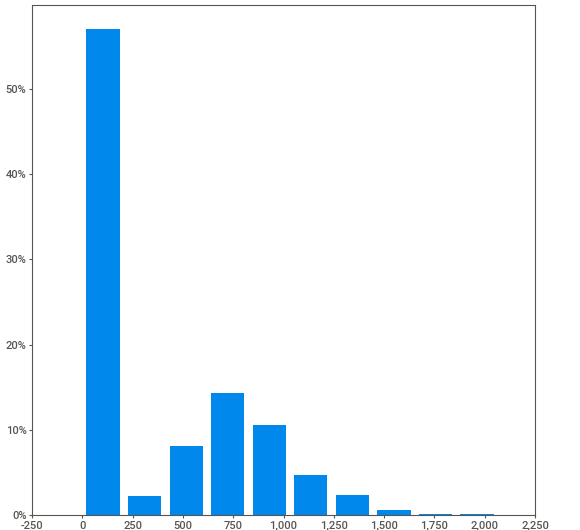
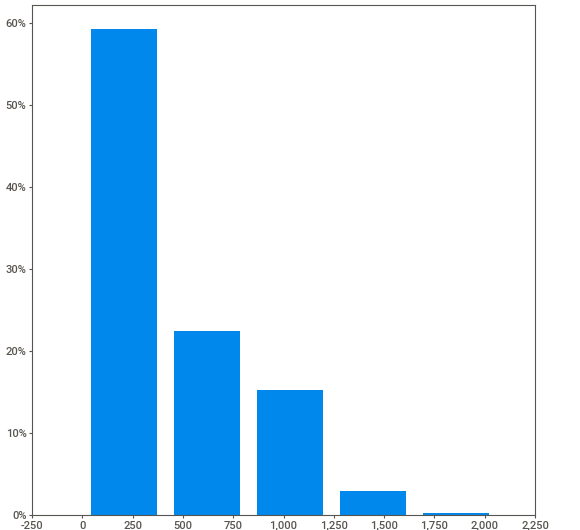
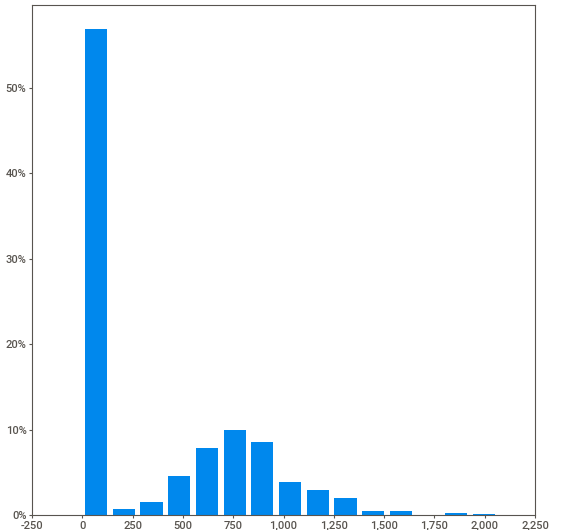
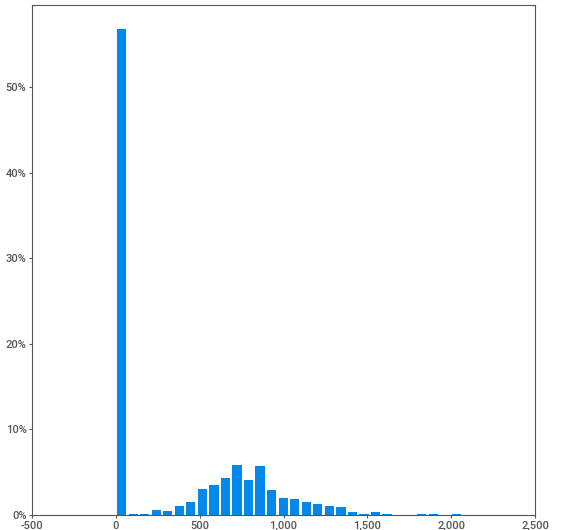
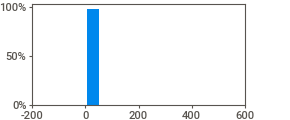
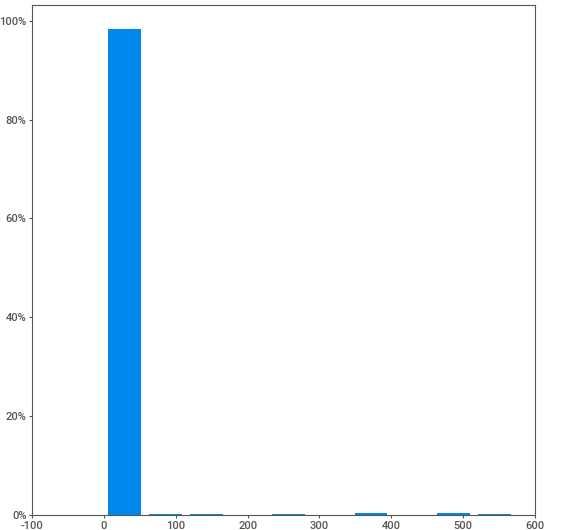
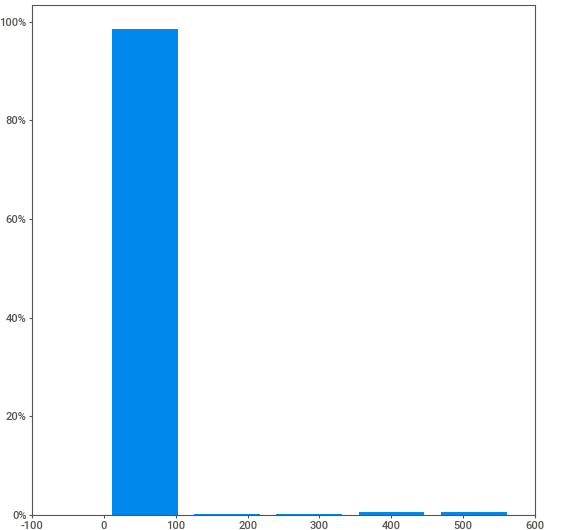
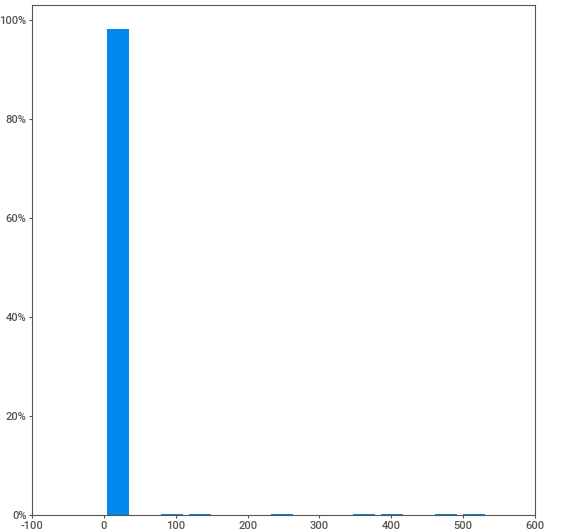
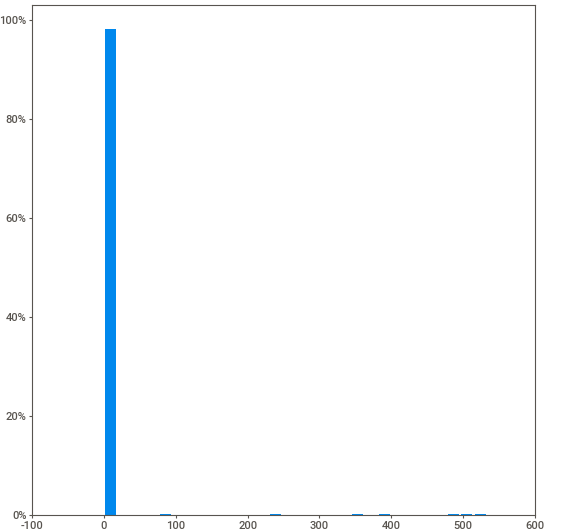
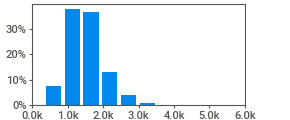
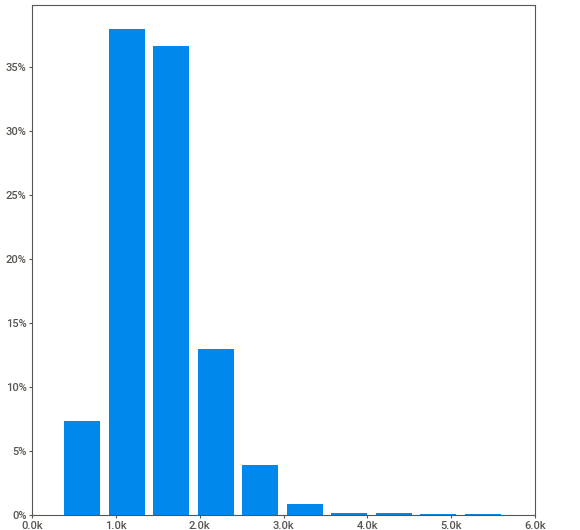
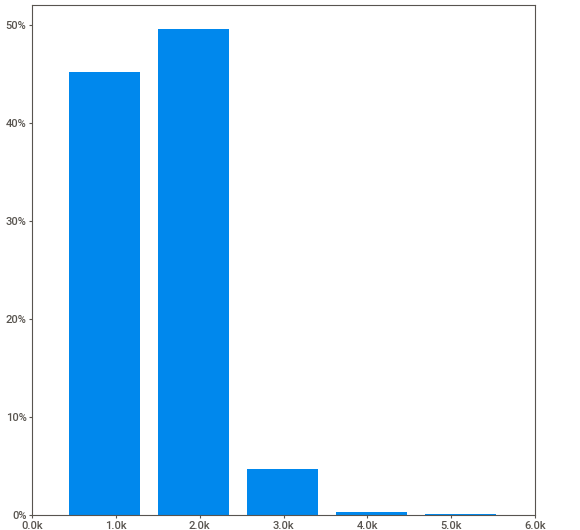
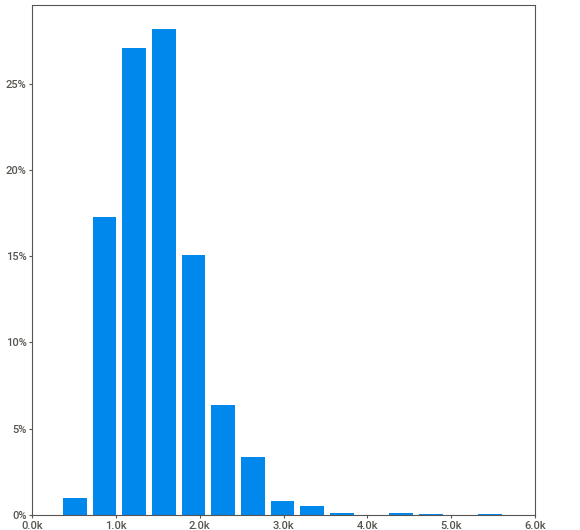
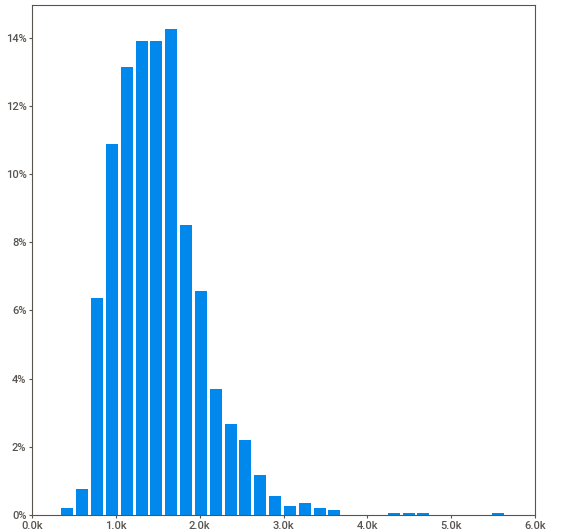
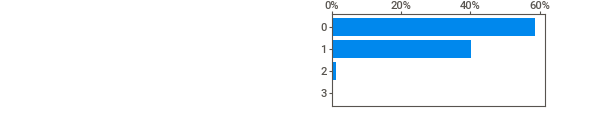
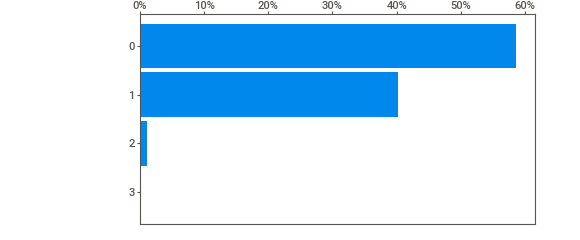
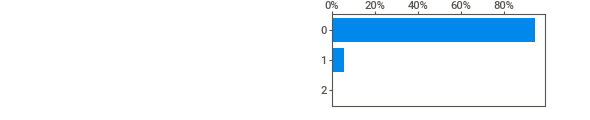
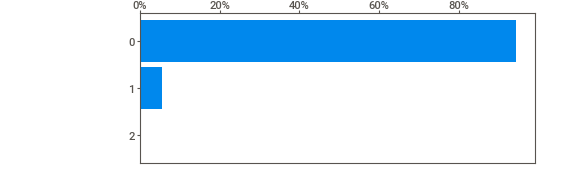
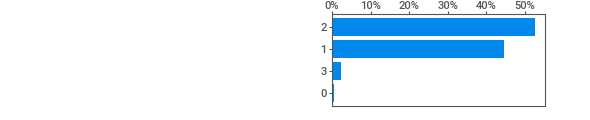
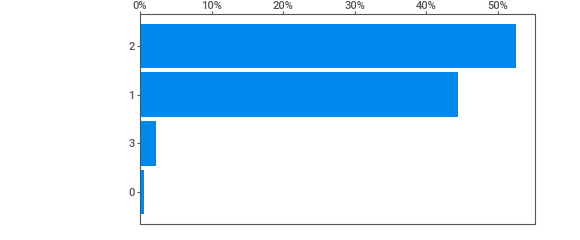
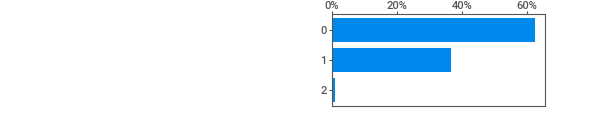
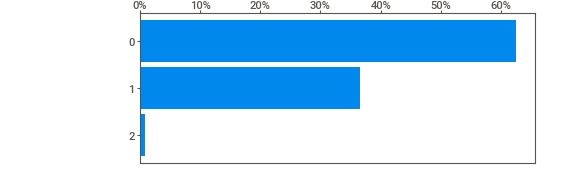
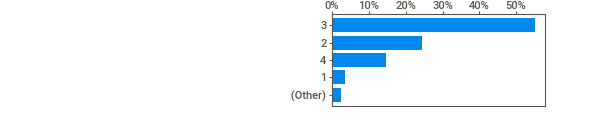
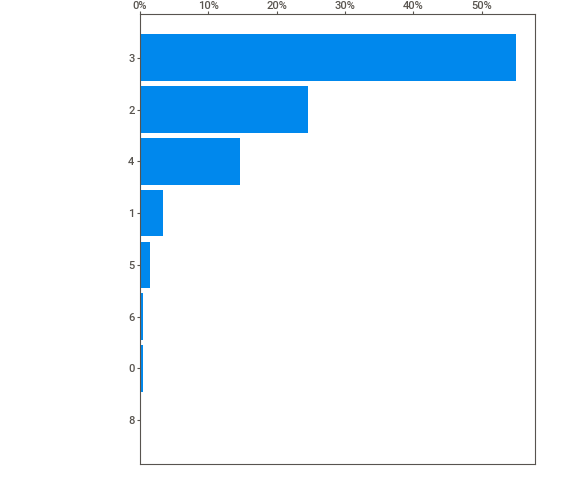
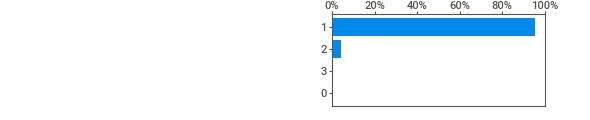
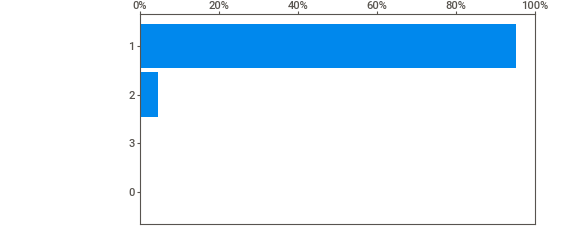
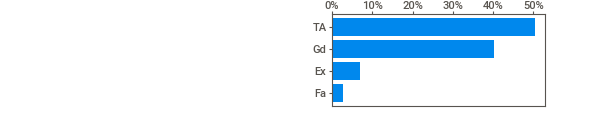
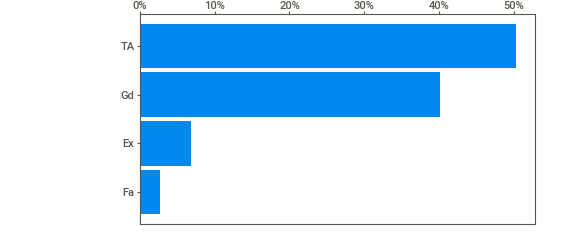
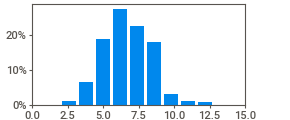
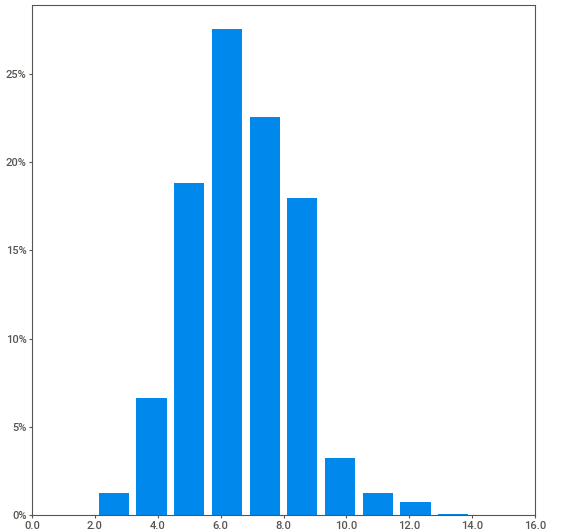
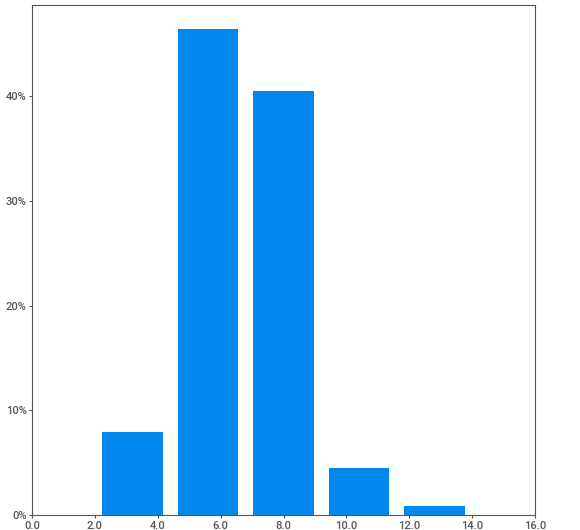
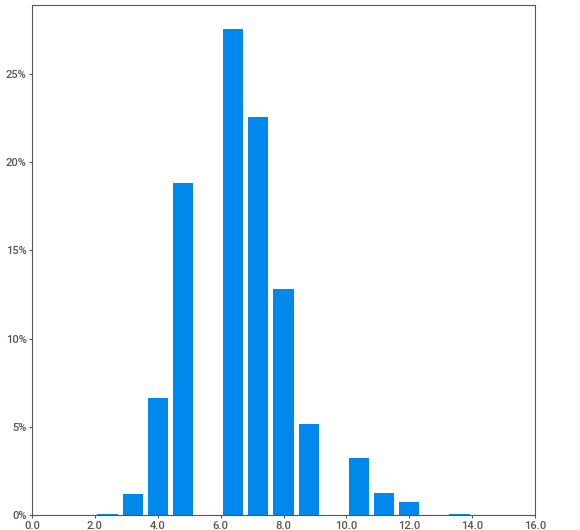
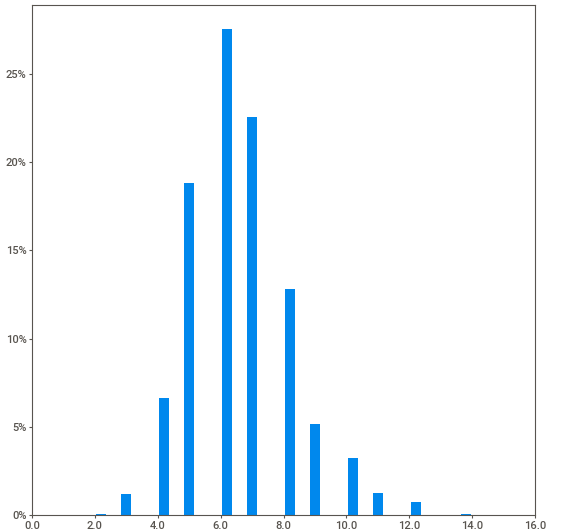
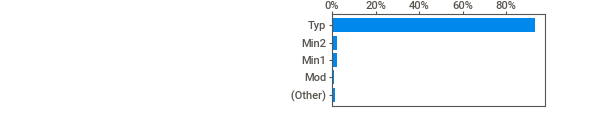
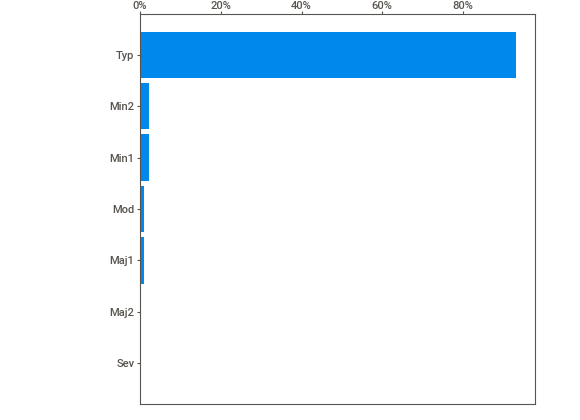
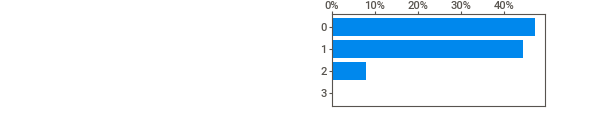
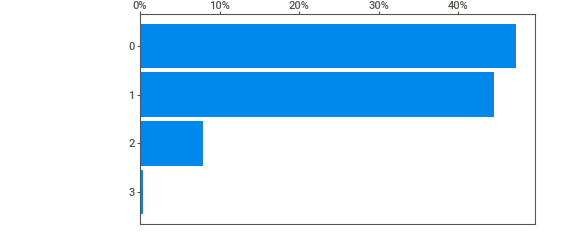
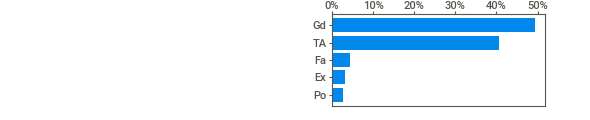
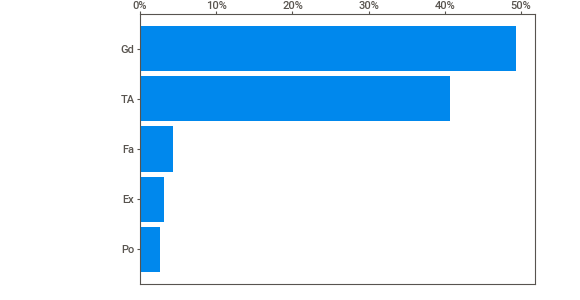
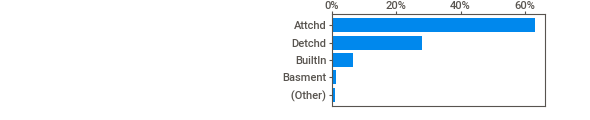
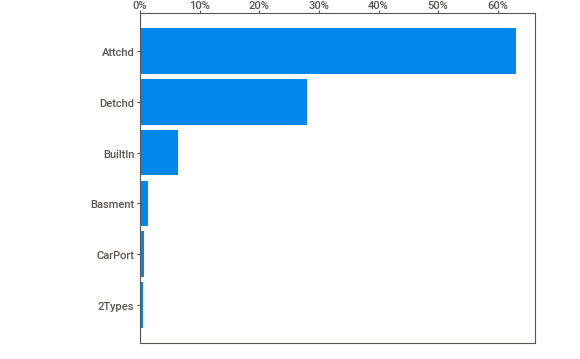
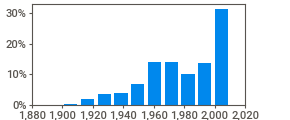
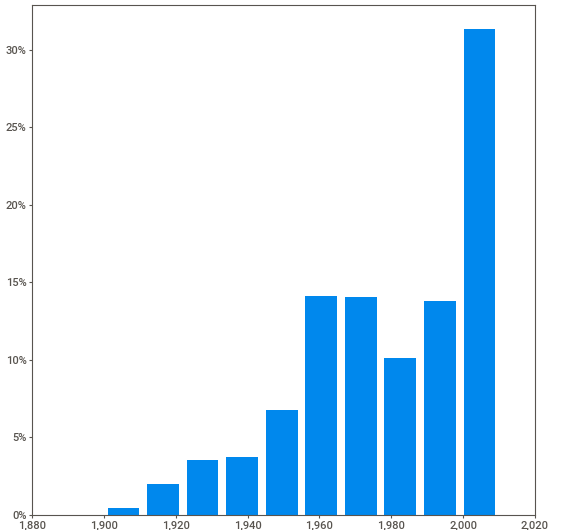
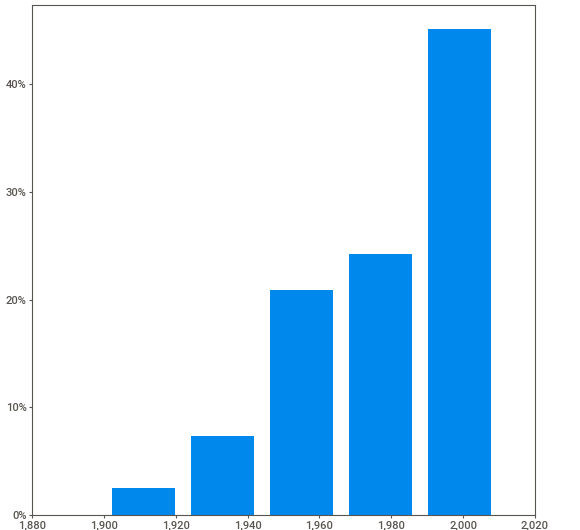
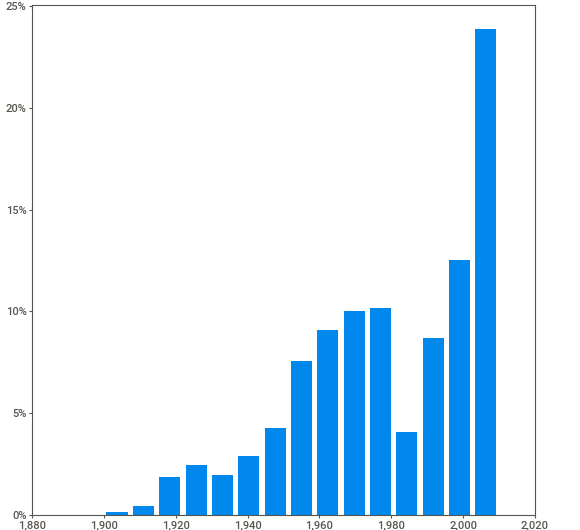
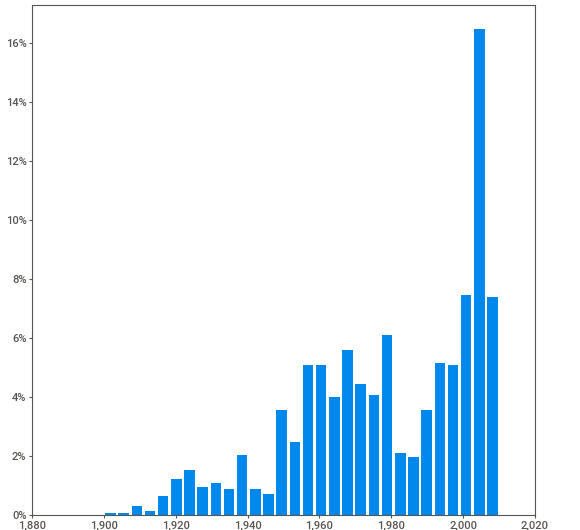
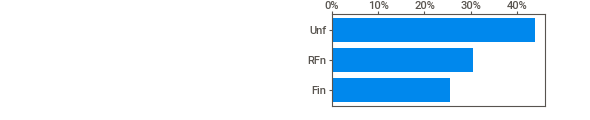
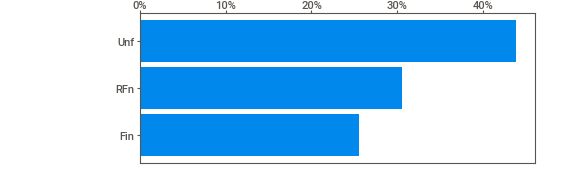
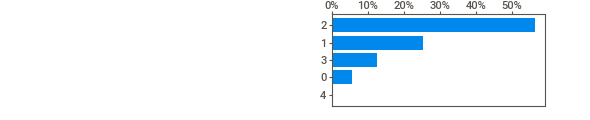
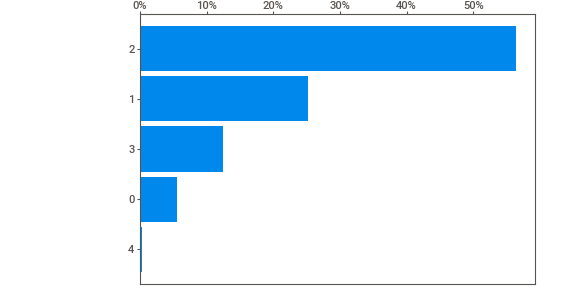
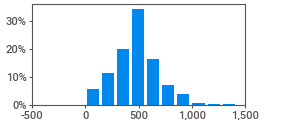
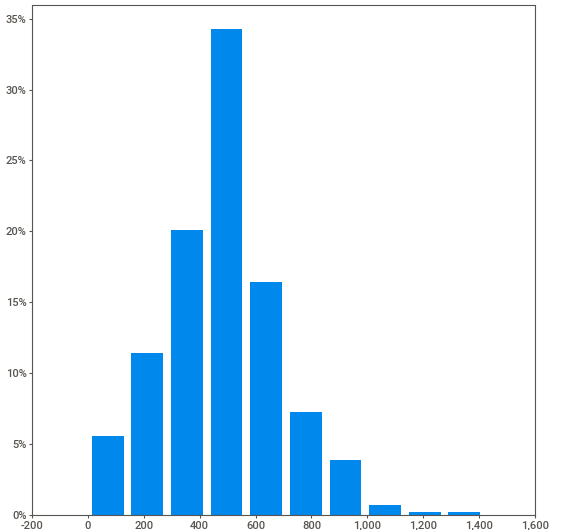
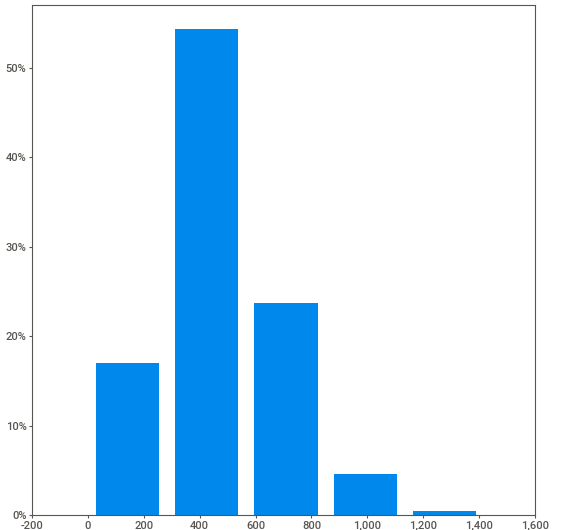
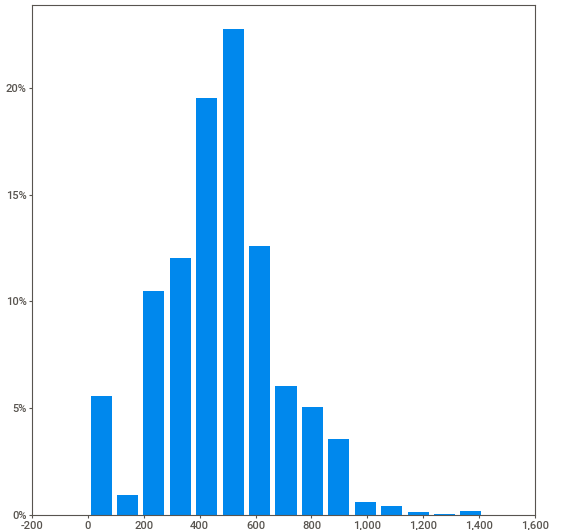
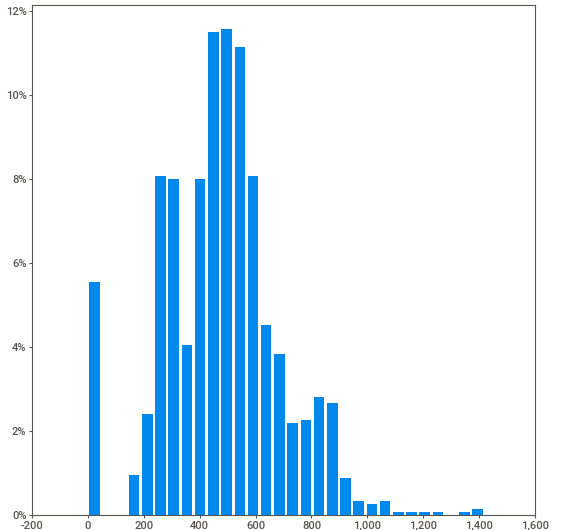
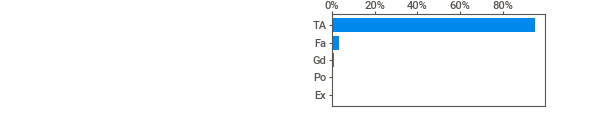
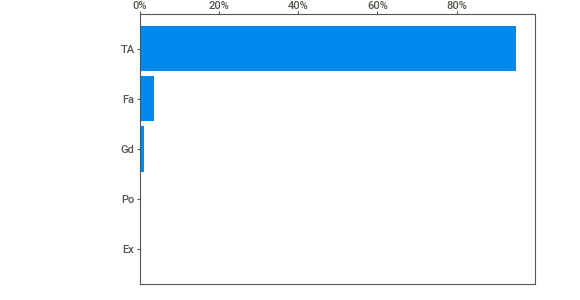
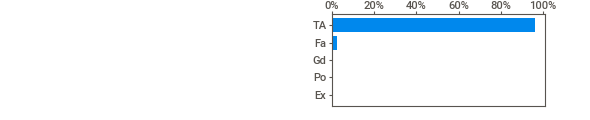
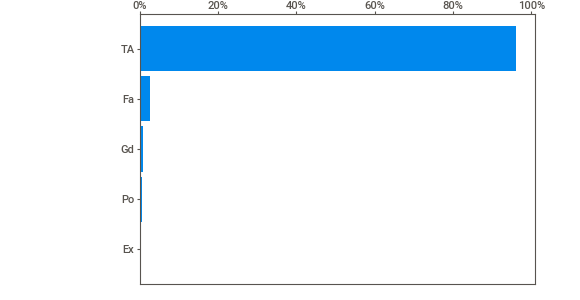
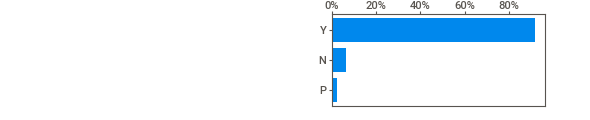
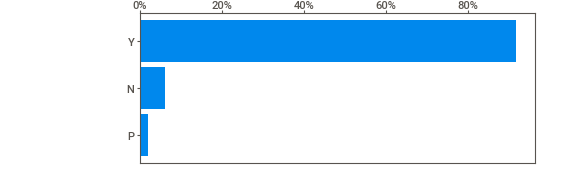
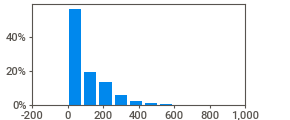
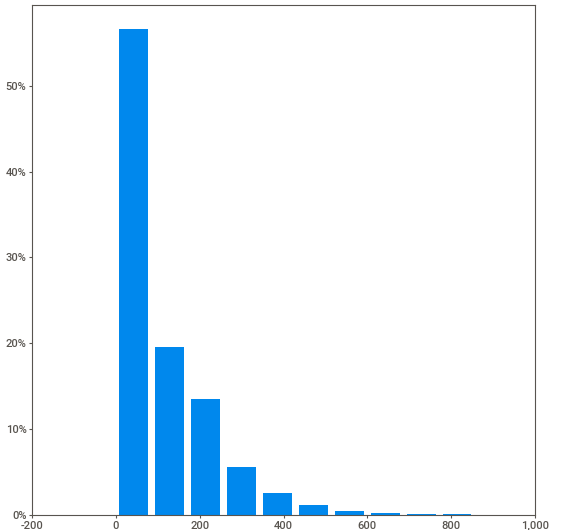
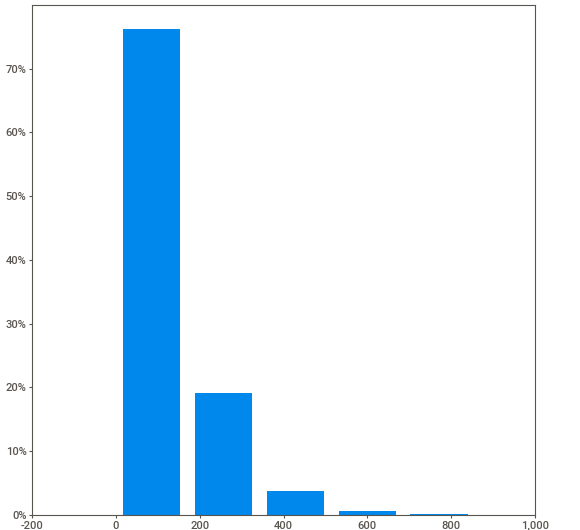
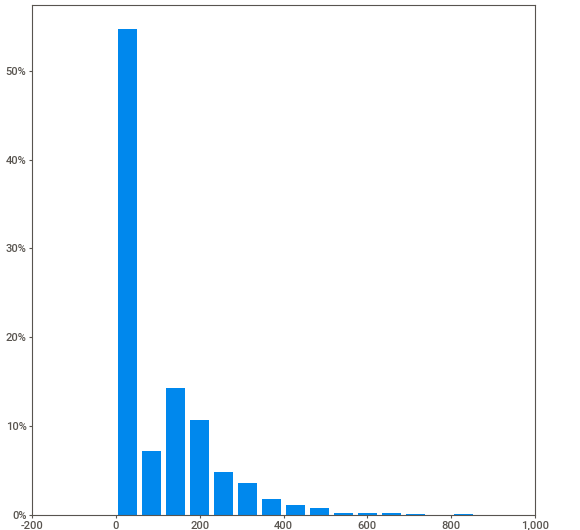
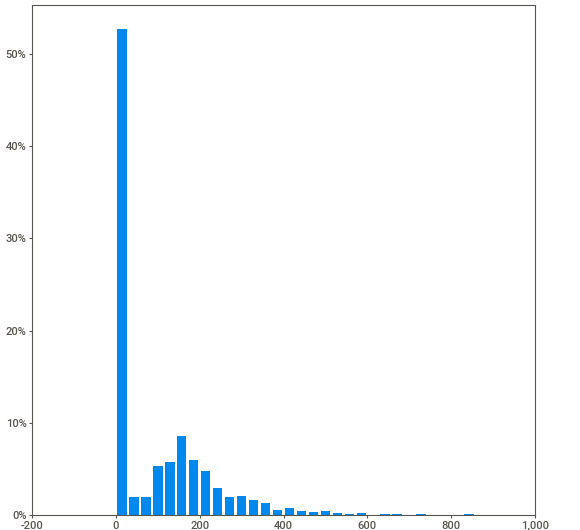
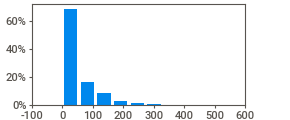
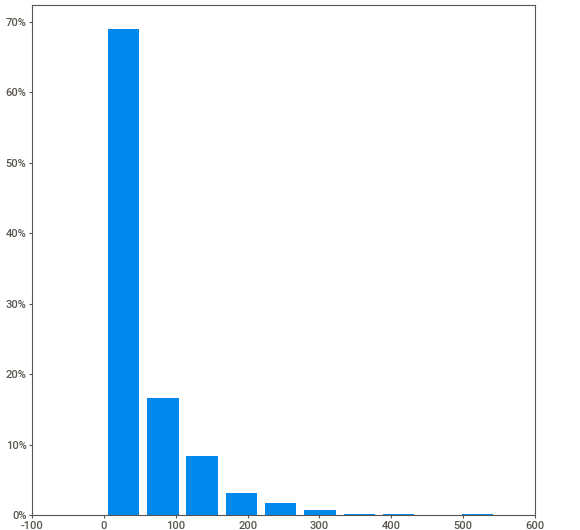
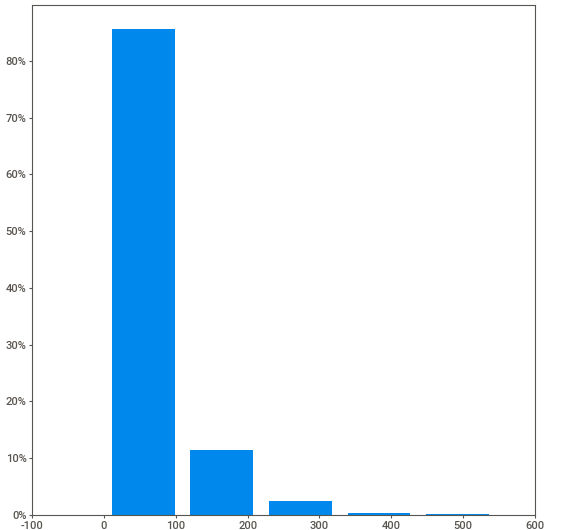
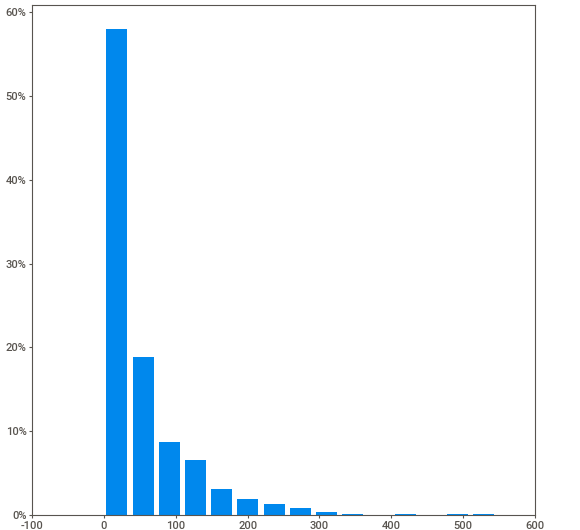
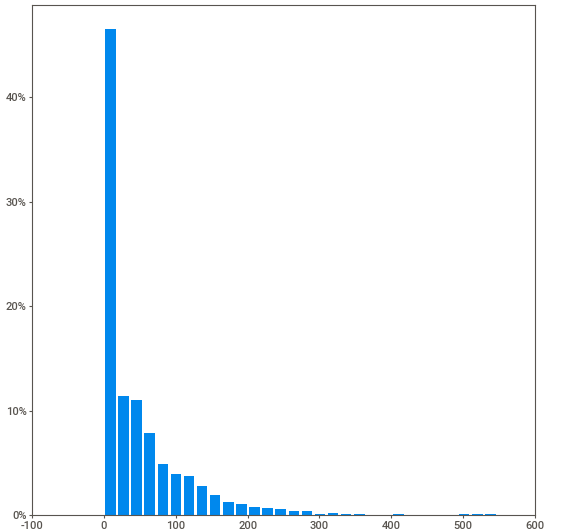
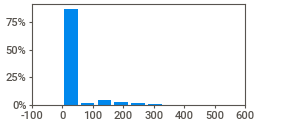
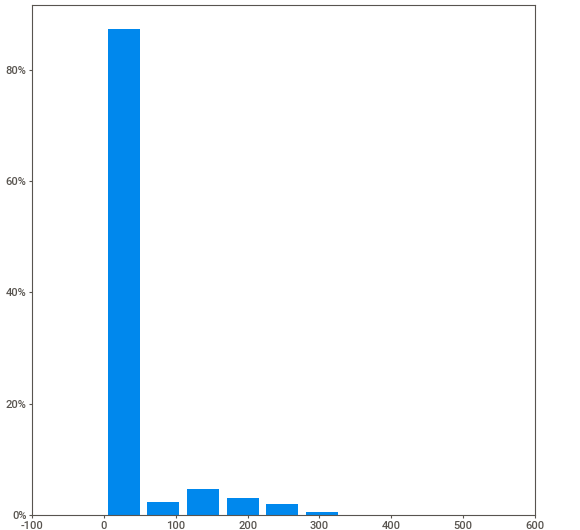
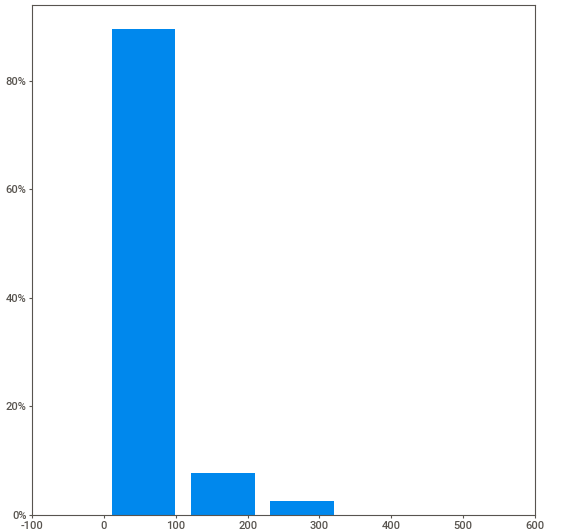
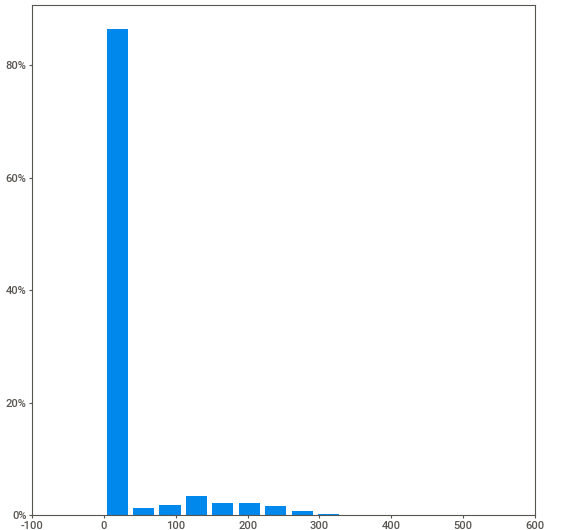
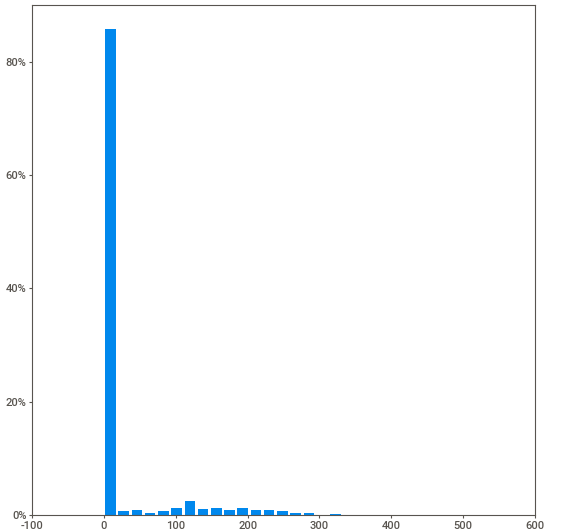
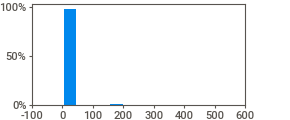
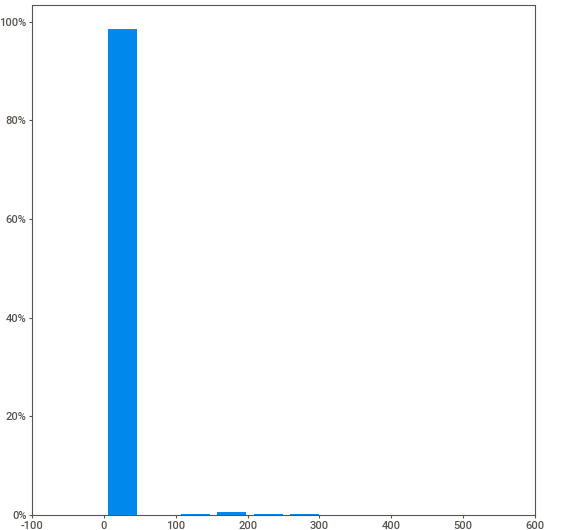
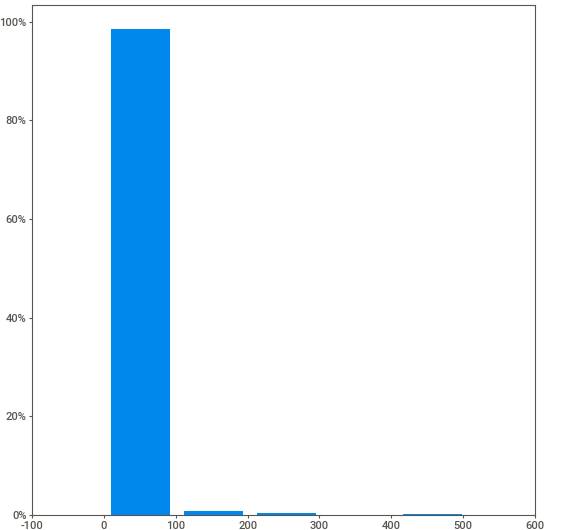
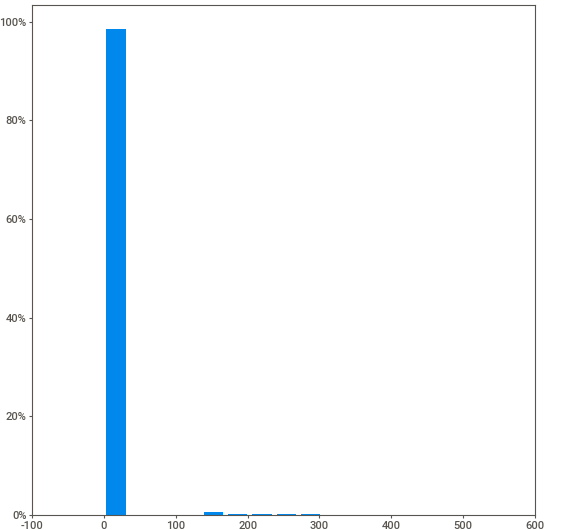
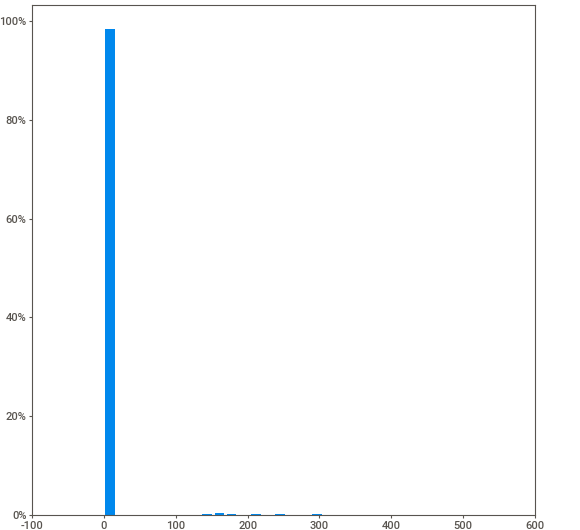
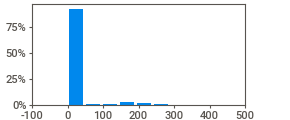
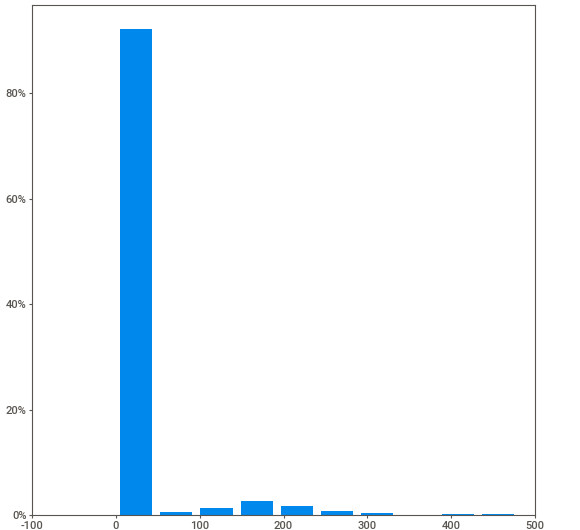
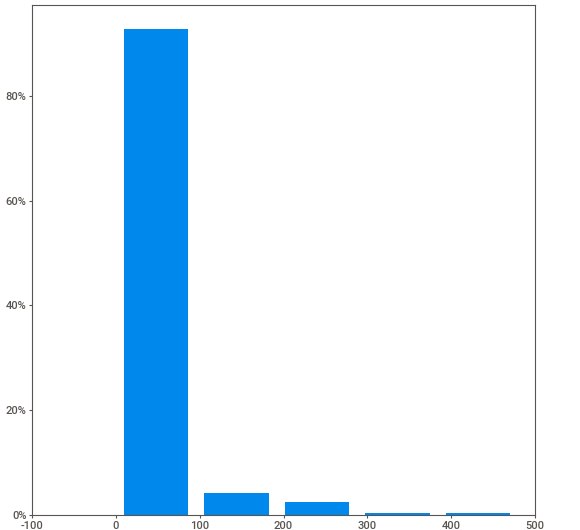
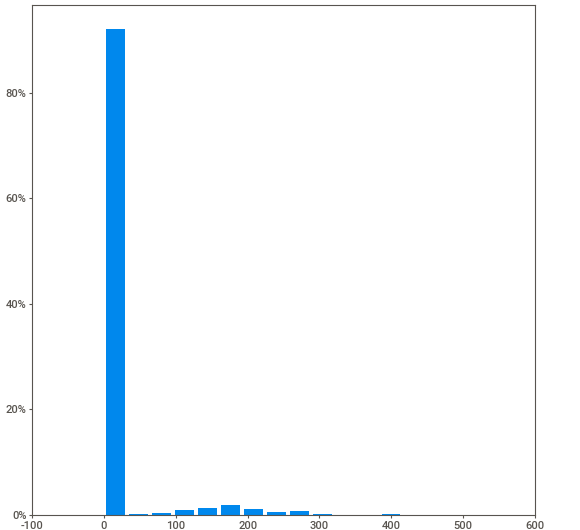
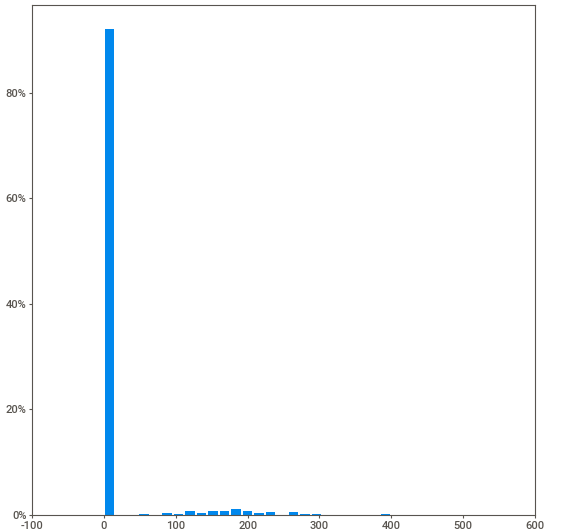
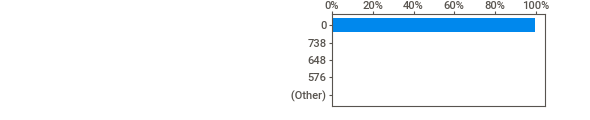
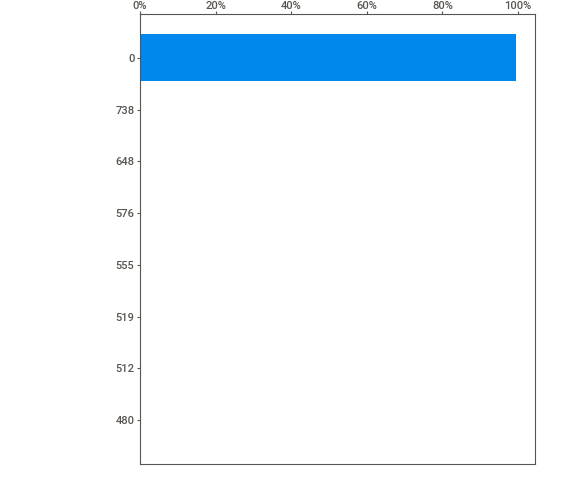
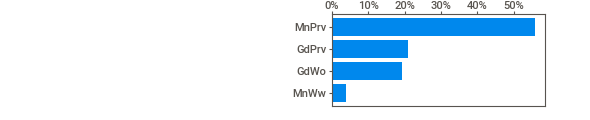
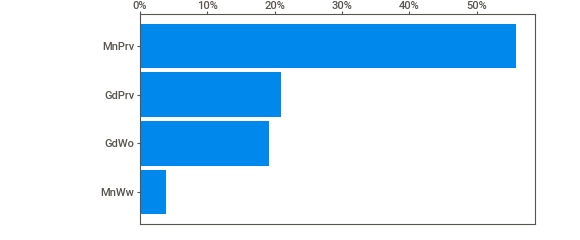
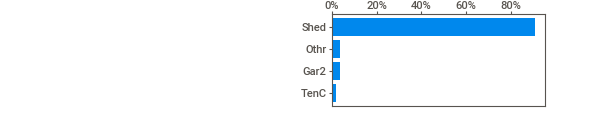
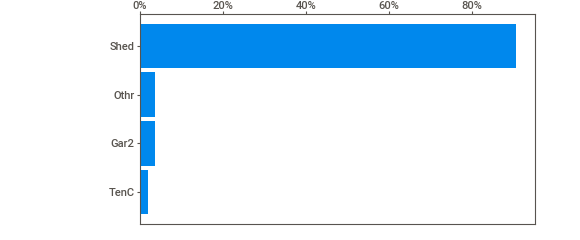
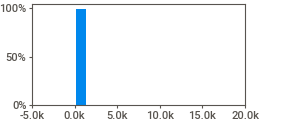
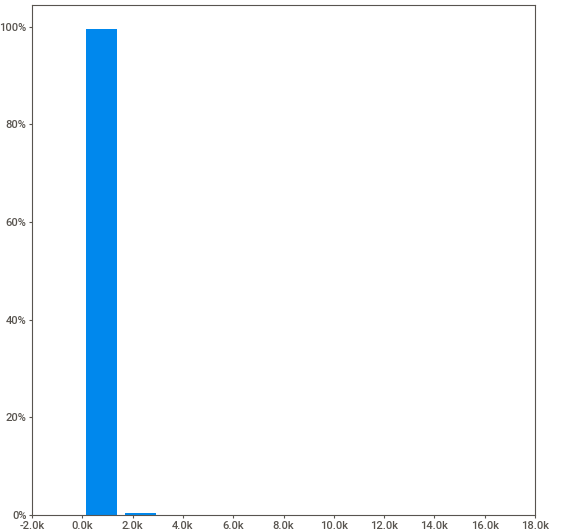
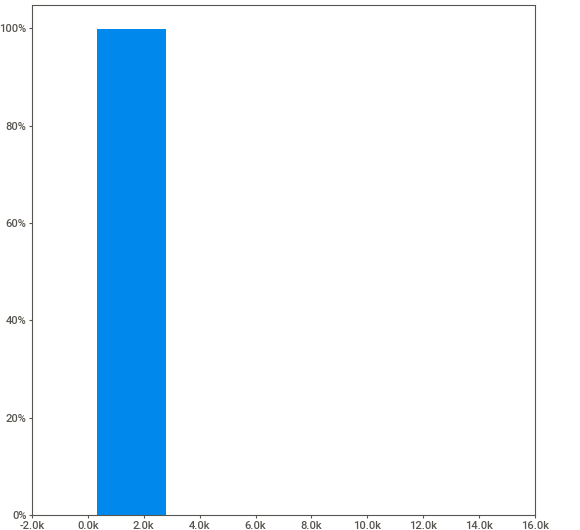
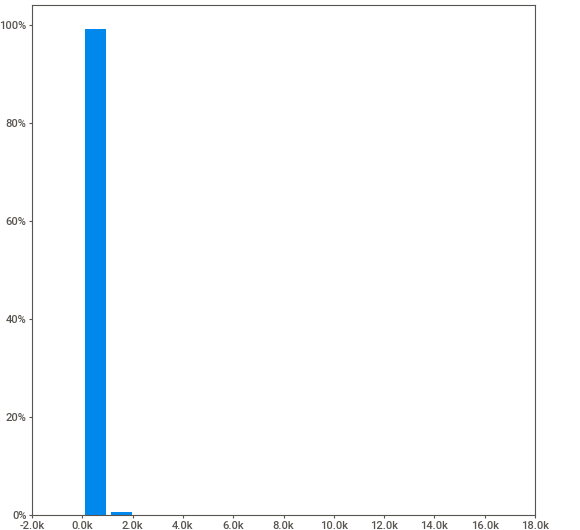
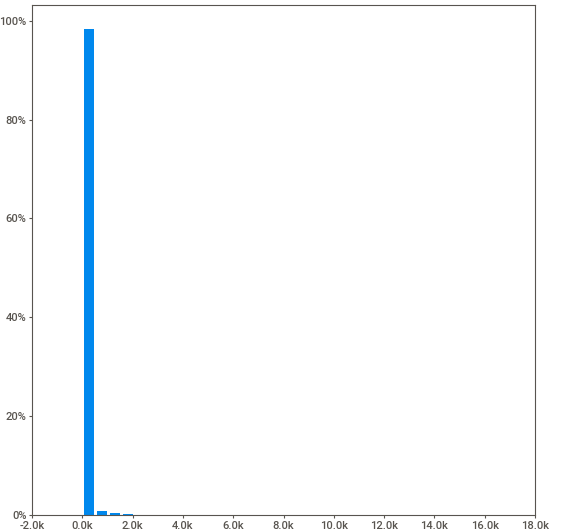
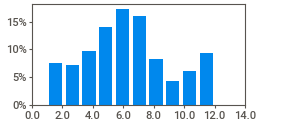
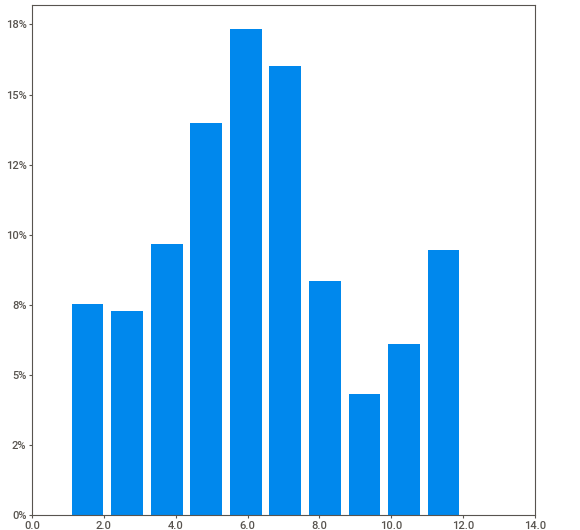
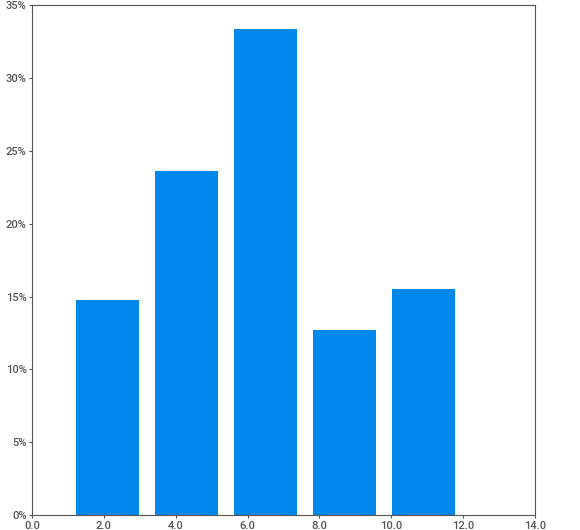
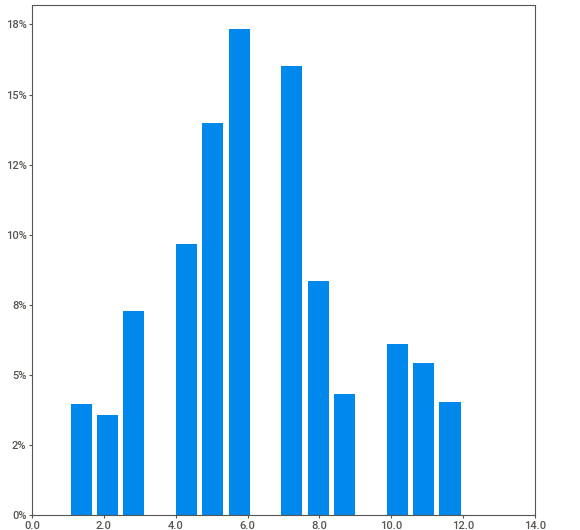
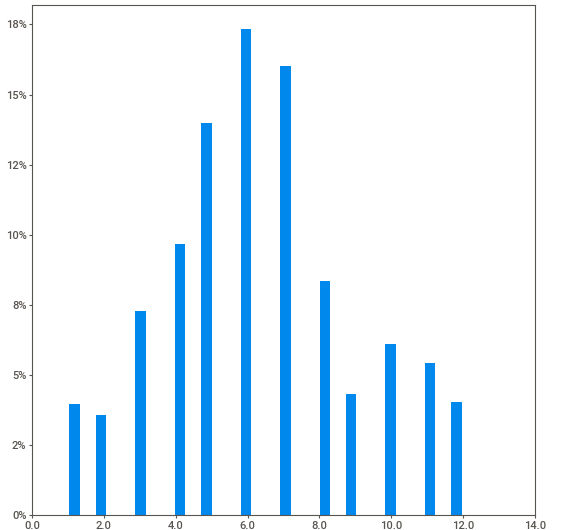
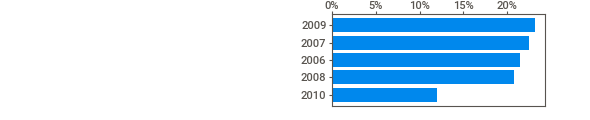
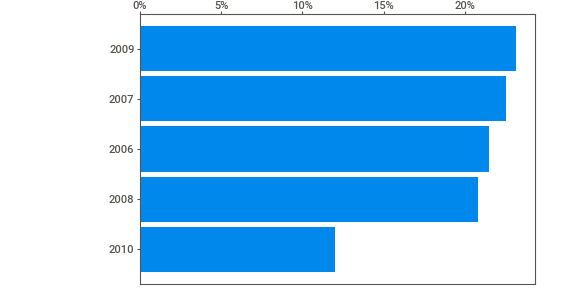
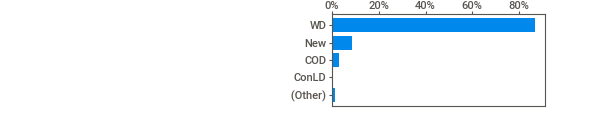
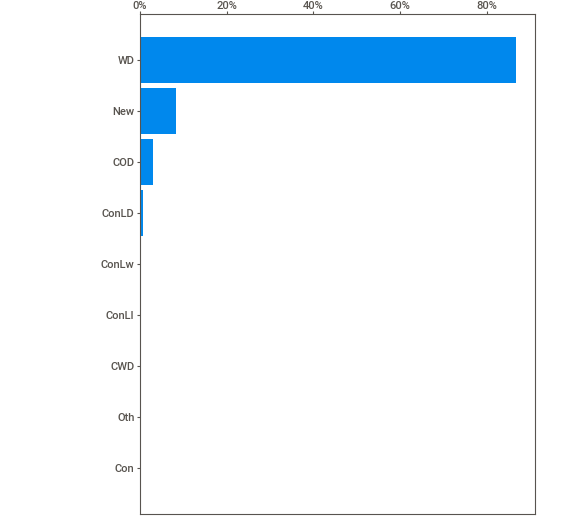
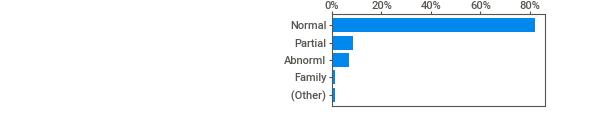
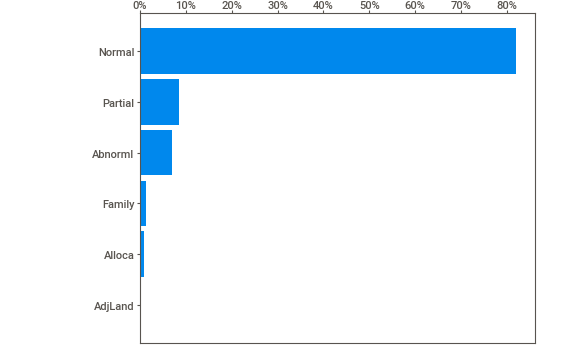
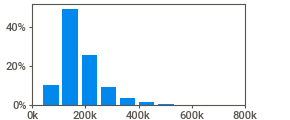
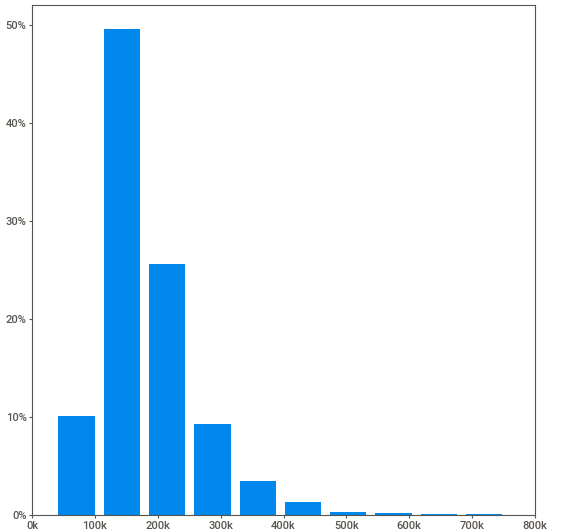
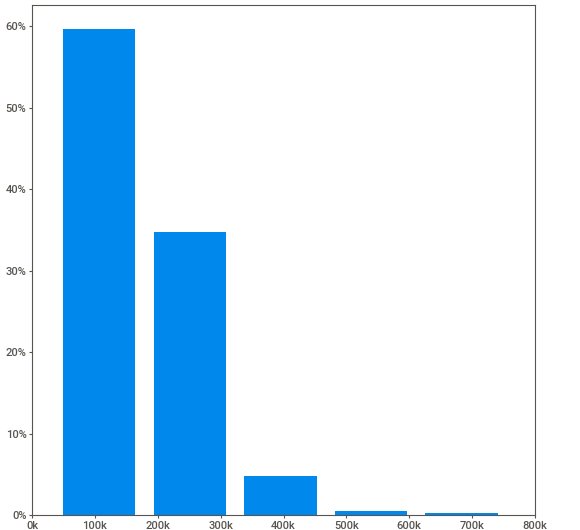
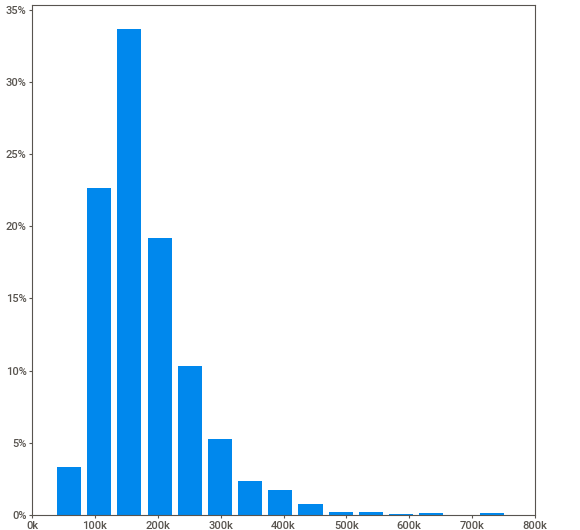
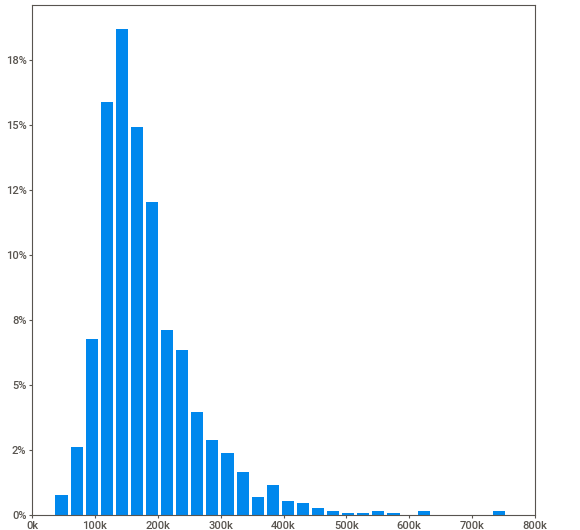
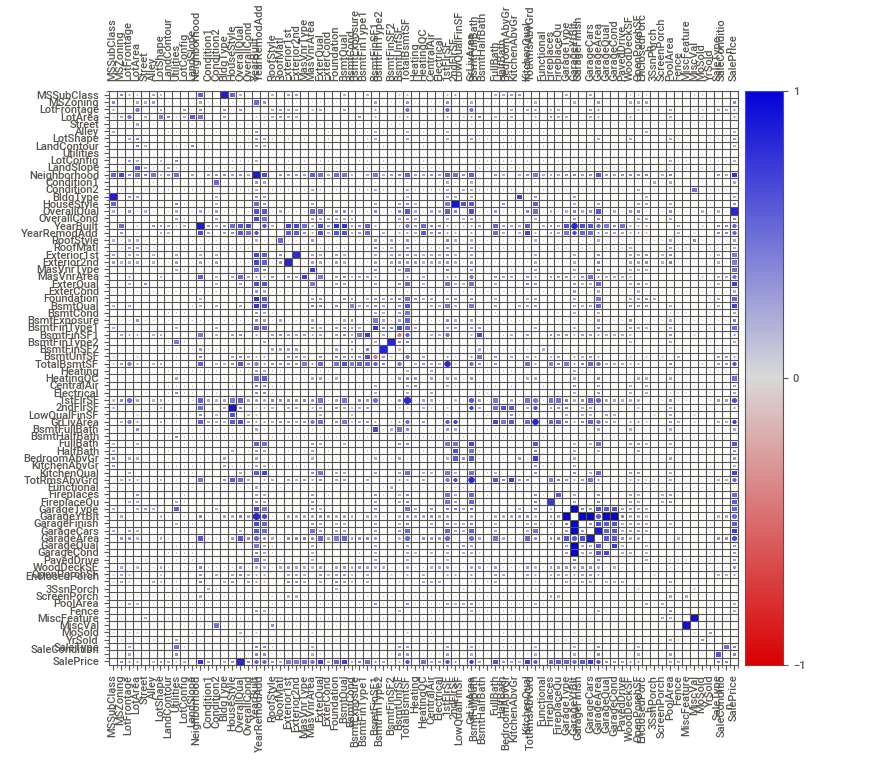
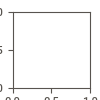

In [ ]:
my_report = sv.analyze(df)
my_report.show_notebook() # Default arguments will generate to "SWEETVIZ_REPORT.html"

### The target
#### The distribution


 mu = 180921.20 and sigma = 79415.29



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'SalePrice distribution')

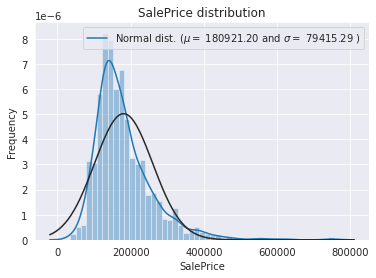

In [ ]:
## TASK ##
"""
Replace None with your code
* Plot the distribution of outcome variable
"""

sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

## TASK ##

In [ ]:
## TASK ##
"""
Replace None with your code
* Remove the data samples which have z-score >= 3
"""

df = df[(np.abs(stats.zscore(df.SalePrice)) < 3)]

## TASK ##

### Missing values
#### Calculating the rate of missing value

In [ ]:
## TASK ##
"""
Replace `pass` with your code
* Remove the columns having missing rate > 10%
* For columns having missing rate <= 10%, fill the missing data with proper values:
    * Replace continous variable with means
    * Replace categorical variable with modes
"""

pass

## TASK ##

In [ ]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'miss_rate' :df_na})

In [ ]:
missing_col_drop = list(missing_data[missing_data.miss_rate>10].index)

In [ ]:
df_non_na = df.drop(columns=missing_col_drop)

In [ ]:
# Calculate mean for every NUMERIC data field
means = df_non_na._get_numeric_data().mean()

# Fill NA by mean on NUMERIC data
df_non_na._get_numeric_data().fillna(means, inplace=True)

In [ ]:
# Find the mode of NON-NUMERIC data
modes = df_non_na.mode()

# Fill NA by mode on NON-NUMERIC data field
df_non_na = df_non_na.fillna(modes.to_dict(orient='records')[0])


## 1.2. Remove highly correlated variables

In [ ]:
## TASK ##
"""
Replace `pass` with your code
In the dataset, we might want to remove the highly correlated variables.
In fact, for each pair of correlated variables, just remove one of them.

* Remove highly correlated variables (abs(r) > 0.8)

Hint: calculate correlation matrix might be slow with the whole dataset, 
using a fraction of dataset could be faster.
"""

## TASK ##

'\nReplace `pass` with your code\nIn the dataset, we might want to remove the highly correlated variables.\nIn fact, for each pair of correlated variables, just remove one of them.\n\n* Remove highly correlated variables (abs(r) > 0.8)\n\nHint: calculate correlation matrix might be slow with the whole dataset, \nusing a fraction of dataset could be faster.\n'

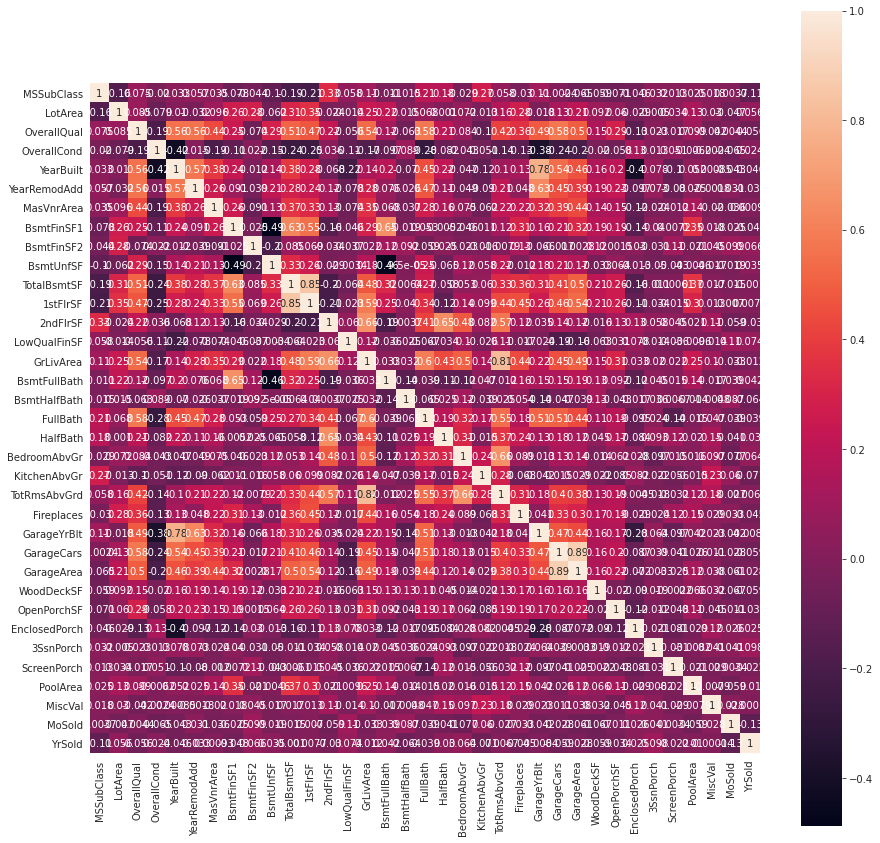

In [ ]:
# Calculate the Correlation matrix of data frame without Dependent variable 
# (Just on 25% of data to speed up the calculation)
corr_matrix = df_non_na.drop(columns=['SalePrice'])._get_numeric_data().sample(frac=0.25).corr()

# Plot the heatmap of Correlation
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, vmax=1, annot=True, square=True);
plt.show()

In [ ]:
# Create correlation matrix
corr_matrix = corr_matrix.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop_corr = [column for column in upper.columns if any(upper[column] >= 0.8)]
print(to_drop_corr)

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']


In [ ]:
train_df = df_non_na.drop(columns=to_drop_corr)
train_df.head()

MSSubClass MSZoning  LotArea  ... SaleType SaleCondition SalePrice
0          60       RL     8450  ...       WD        Normal    208500
1          20       RL     9600  ...       WD        Normal    181500
2          60       RL    11250  ...       WD        Normal    223500
3          70       RL     9550  ...       WD       Abnorml    140000
4          60       RL    14260  ...       WD        Normal    250000

[5 rows x 71 columns]

## 1.3. Normalize the numerical features

In [ ]:
## TASK ##
"""
Replace `pass` with your code
* Normal the numerical feature with MinMaxScaler
"""
## TASK ##

'\nReplace `pass` with your code\n* Normal the numerical feature with MinMaxScaler\n'

In [ ]:
num_cols = train_df.drop(columns=['SalePrice']).select_dtypes(include='number').columns
print(num_cols)
train_df[num_cols].head()

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


MSSubClass  LotArea  OverallQual  ...  MiscVal  MoSold  YrSold
0          60     8450            7  ...        0       2    2008
1          20     9600            6  ...        0       5    2007
2          60    11250            7  ...        0       9    2008
3          70     9550            7  ...        0       2    2006
4          60    14260            8  ...        0      12    2008

[5 rows x 32 columns]

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(train_df[num_cols])

In [ ]:
train_df[num_cols] = scaled_df
train_df.describe()

MSSubClass      LotArea  ...       YrSold      SalePrice
count  1438.000000  1438.000000  ...  1438.000000    1438.000000
mean      0.218011     0.042541  ...     0.455146  175844.522253
std       0.250177     0.046486  ...     0.331701   67475.861228
min       0.000000     0.000000  ...     0.000000   34900.000000
25%       0.000000     0.028979  ...     0.250000  129500.000000
50%       0.176471     0.037860  ...     0.500000  161500.000000
75%       0.294118     0.047400  ...     0.750000  210000.000000
max       1.000000     1.000000  ...     1.000000  415298.000000

[8 rows x 33 columns]

## 1.4. Categorical variable handling

In [ ]:
## TASK ##
"""
* Transform categorical variables into one-hot encoding variables
* Please remember remove one columns from the one-hot encoding columns,
it means that a n-category variabel would be transformed in to n-1 new columns
"""

## TASK ##

'\n* Transform categorical variables into one-hot encoding variables\n* Please remember remove one columns from the one-hot encoding columns,\nit means that a n-category variabel would be transformed in to n-1 new columns\n'

In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True)
train_df.head()


MSSubClass   LotArea  ...  SaleCondition_Normal  SaleCondition_Partial
0    0.235294  0.033420  ...                     1                      0
1    0.000000  0.038795  ...                     1                      0
2    0.235294  0.046507  ...                     1                      0
3    0.294118  0.038561  ...                     0                      0
4    0.235294  0.060576  ...                     1                      0

[5 rows x 229 columns]

## 1.5. Feature selection


In [ ]:
## TASK ##
"""
* Extract ["OverallQual", "GrLivArea"]
from the full dataset for further training
"""
## TASK ##

'\n* Extract ["OverallQual", "GrLivArea"]\nfrom the full dataset for further training\n'

In [ ]:
ft = ["OverallQual", "GrLivArea", "SalePrice"]
train_df = train_df[ft]

## 1.6. Training/Test splitting

In [ ]:
## TASK ##
"""
Split the dataframe into 2 part
* Training dataset (60%)
* Test dataset (40%)
"""
## TASK ##

'\nSplit the dataframe into 2 part\n* Training dataset (60%)\n* Test dataset (40%)\n'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(columns=['SalePrice']), train_df.SalePrice, test_size=0.4, random_state=42)

## 1.7. Linear regression -- scikit-learn

In [ ]:
# Create linear regression object
regr = LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)

# Predict on Test set
y_pred = regr.predict(X_test)

# Evaluation on Test set
print(f'R-squared = {r2_score(y_test, y_pred):.4f}')
print(f'RMSE       = {mean_squared_error(y_test, y_pred)**0.5:.2f}')

R-squared = 0.7188
RMSE       = 34635.44


In [ ]:
print(regr.coef_)
print(regr.intercept_)

[294385.76324964 207429.44169987]
-34450.019859232794


## 1.8. Linear regression -- Gradient descent approach

In [ ]:
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]

In [ ]:
def loss_function(x, y, w):
    pred = np.dot(x, w)
    loss = 0.5 * np.mean( (y - pred)**2)
    return loss
    
def loss_prime(x, y, w):
    pred = np.dot(x, w)
    d_loss = -np.mean( np.dot(x.T, (y - pred)))
    return d_loss

def gradient_descent(X_train, X_test, y_train, y_test, learning_rate, epochs):
    w = np.random.rand(X_train.shape[1])
    history = {
        'train_loss': [],
        'test_loss': [],
        'weight': [w, ],
    }
    for i in range(epochs):
        # Training loss
        train_loss = loss_function(X_train, y_train, w)
        history['train_loss'].append(train_loss)

        # Gradient descent
        grad = loss_prime(X_train, y_train, w)
        w = w - learning_rate*grad
        history['weight'].append(w)

        # Testing loss
        test_loss = loss_function(X_test, y_test, w)
        history['test_loss'].append(test_loss)

    return history

In [ ]:
learning_rate = 1e-4
epochs = 20

history = gradient_descent(X_train_with_bias, X_test_with_bias, 
                           y_train, y_test, 
                           learning_rate=learning_rate, 
                           epochs=epochs)

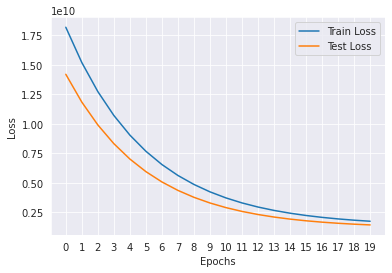

In [ ]:
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(epochs))
plt.legend()

In [ ]:
w = history['weight'][-1]
y_pred = np.dot(X_test_with_bias, w)
print(f'R-squared   = {r2_score(y_test, y_pred):.4f}')
print(f'RMSE        = {mean_squared_error(y_test, y_pred)**0.5:.4f}')

R-squared   = 0.3226
RMSE        = 53756.0049


# 2. Predicting Bankruptcy using Logistic Regression


## 2.1. Data loading
The data consist of 64 financial ratio & 1 label (0 - no bankruptcy & 1 - bankruptcy after 5 years)

The NA values in data set were marked as "?" which will be imputed by 0 later.

List of attributes:

* X1 net profit / total assets
* X2 total liabilities / total assets
* X3 working capital / total assets
* X4 current assets / short-term liabilities
* X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
* ...

More info: https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [ ]:
# Data loading
DATA_LINK = 'https://github.com/pnhuy/datasets/raw/master/polish_bankruptcy/1st_year.csv'
df_bankruptcy = pd.read_csv(DATA_LINK, na_values=['?'])

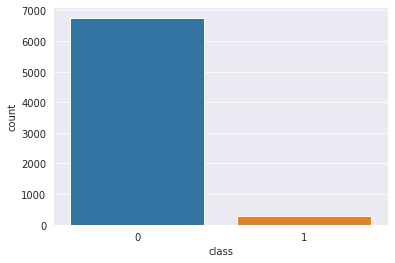

In [ ]:
sns.countplot(x="class", data=df_bankruptcy)

## 2.2. Data preprocessing

* NA filling by 0
* Standard scaling
* Train-test splitting


In [ ]:
# The NA in X dataframe was imputed by Mean
X = df_bankruptcy.drop(columns=['class']).fillna(0)
y = df_bankruptcy['class']

# Scaling the features matrix by Standard scaling
scl = StandardScaler()
scl.fit(X)
X_scaled = scl.transform(X) 

# Split the data into train and test dataset with the ratio 60:40
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.4)

## 2.3. Hyperparameter Optimization using Grid Search

In [ ]:
# Initiate the Logistic Regression model
logreg = LogisticRegression()

In [ ]:
"""
Define the hyperparameter space
:params: penalty: Regularization method
:params: C: Regularization term, detail here: 
            https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
:params: solver: optimization algorithms
:params: class_weight: The “balanced” mode uses the values of y to automatically 
                       adjust weights inversely proportional to class frequencies 
                       in the input data as n_samples / (n_classes * np.bincount(y)).
"""

## TASK ##
"""
Replace None with the list of values for hyperparameter, 
please refer the scikit-learn for more information
"""

param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [-2, -1, -0.5, 0.5, 1],
    'class_weight': ['balanced']
}

## TASK ##

In [ ]:
# Initiate the Gridsearch with Cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', verbose=True, n_jobs=-1)

In [ ]:
# Fit the data and hyperparameter space to the model 
# and benchmark to find out the best classifier
# ~ 5 min in Colab
best_clf = grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Showing the best params set
best_clf.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

## 2.4. Results

In [ ]:
# Calculate the prediction in test set
y_pred = best_clf.predict(X_test)

# Print the metrics on test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      2695
           1       0.09      0.73      0.15       116

    accuracy                           0.66      2811
   macro avg       0.53      0.70      0.47      2811
weighted avg       0.95      0.66      0.76      2811



In [ ]:
# Print the AUC score
y_score = best_clf.decision_function(X_test)
auc_score = roc_auc_score(y_test, y_score)
print(f"AUC = {auc_score}")

AUC = 0.7425404644616468


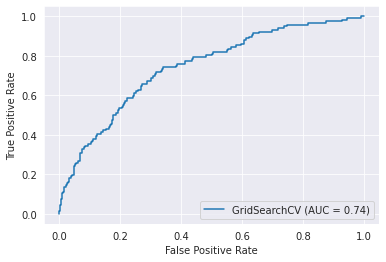

In [ ]:
# Plot the ROC 
plot_roc_curve(best_clf, X_test, y_test)

# Feature Engineering

## Coverage

In [ ]:
((X != 0).sum()/len(X)).sort_values(ascending=False)

Attr43    0.999858
Attr9     0.999858
Attr56    0.999858
Attr13    0.999715
Attr36    0.999573
            ...   
Attr27    0.885157
Attr21    0.769176
Attr6     0.618899
Attr37    0.609506
Attr59    0.609506
Length: 64, dtype: float64

## Correlation between features and lables using Chi-square test

In [ ]:
# Scaling the features matrix
scl = MinMaxScaler()
scl.fit(X)
X_scaled = scl.transform(X) 

# Split the data into train and test dataset with the ratio 60:40
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y , test_size=0.4)

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [ ]:
fs_score = pd.DataFrame({
    'Features': X.columns,
    'Chi Square Score': fs.scores_
})
fs_score.sort_values(by='Chi Square Score', ascending=False)

Features  Chi Square Score
49   Attr50          0.310530
63   Attr64          0.098779
8     Attr9          0.091653
32   Attr33          0.080965
35   Attr36          0.074582
..      ...               ...
0     Attr1          0.000011
48   Attr49          0.000011
55   Attr56          0.000010
4     Attr5          0.000009
7     Attr8          0.000009

[64 rows x 2 columns]

## AUC when predict using 1 feature

In [ ]:
auc_feature = dict()
for i in X:
    x = X[i].to_numpy().reshape(-1, 1)
    clf = LogisticRegression()
    clf.fit(x, y)
    y_score = clf.decision_function(x)
    auc_feature[i] = roc_auc_score(y, y_score)

auc_feature = pd.Series(auc_feature).sort_values(ascending=False)
auc_feature

Attr24    0.717391
Attr13    0.713209
Attr26    0.707253
Attr16    0.702939
Attr23    0.697979
            ...   
Attr40    0.365024
Attr50    0.362538
Attr4     0.342941
Attr45    0.321930
Attr46    0.311589
Length: 64, dtype: float64

## Information Value (IV) and Weight of Evidence (WOE)

In [ ]:
"""
What is Information Value (IV) and Weight of Evidence (WOE)?
~> http://ucanalytics.com/blogs/information-value-and-weight-of-evidencebanking-case/

Code credit: https://github.com/Sundar0989/WOE-and-IV/blob/master/WOE_IV.ipynb
"""

# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
final_iv, IV = data_vars(df_bankruptcy, df_bankruptcy['class'])

In [ ]:
final_iv

VAR_NAME   MIN_VALUE      MAX_VALUE  ...  DIST_NON_EVENT       WOE        IV
0      Attr1 -256.890000       0.021159  ...        0.239491  0.754375  0.365904
1      Attr1    0.021190       0.075801  ...        0.251184 -0.143012  0.365904
2      Attr1    0.075803       0.160260  ...        0.253552 -0.468734  0.365904
3      Attr1    0.160290      94.280000  ...        0.255329 -0.802928  0.365904
4      Attr1         NaN            NaN  ...        0.000444  0.000000  0.365904
..       ...         ...            ...  ...             ...       ...       ...
295   Attr63    8.360300    1042.200000  ...        0.252960 -0.538717  0.144540
296   Attr63         NaN            NaN  ...        0.004440  0.000000  0.144540
297   Attr64    0.000010       4.637700  ...        0.497336  0.016352  0.031702
298   Attr64    4.638500  294770.000000  ...        0.498520 -0.053977  0.031702
299   Attr64         NaN            NaN  ...        0.004144  1.675622  0.031702

[300 rows x 12 columns]

In [ ]:
IV.sort_values('IV')

VAR_NAME        IV
29   Attr36  0.000015
12   Attr20  0.000129
37   Attr43  0.000714
54   Attr59  0.001194
30   Attr37  0.001550
..      ...       ...
18   Attr26  0.551701
4    Attr13  0.578226
16   Attr24  0.689102
2    Attr11  1.012825
19   Attr27  1.400969

[64 rows x 2 columns]

## Text

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
# Loading sample data
train = fetch_20newsgroups(
    subset='train',
    categories=['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'], 
    shuffle=True, random_state=42
)

test = fetch_20newsgroups(
    subset='test',
    categories=['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian'], 
    shuffle=False
)

X_train = train['data']
y_train = train['target']

X_test = test['data']
y_test = test['target']

In [ ]:
# Feature engineering

## Bag-of-word
count_vectorizer = CountVectorizer()
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

## TF-IDF matrix
tfidf_transformer = TfidfTransformer()
X_train = tfidf_transformer.fit_transform(X_train)
X_test = tfidf_transformer.transform(X_test)

In [ ]:
# Modeling
text_svc = SVC()
text_svc.fit(X_train, y_train)
y_pred = text_svc.predict(X_test)

In [ ]:
# Performace evaluation
print(metrics.classification_report(y_test, y_pred, target_names=train.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.97      0.77      0.86       319
         comp.graphics       0.84      0.96      0.89       389
               sci.med       0.91      0.87      0.89       396
soc.religion.christian       0.88      0.94      0.91       398

              accuracy                           0.89      1502
             macro avg       0.90      0.88      0.89      1502
          weighted avg       0.90      0.89      0.89      1502



## Image

In [ ]:
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics

In [ ]:
# Load data 
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(train_images.shape)

(60000, 28, 28)


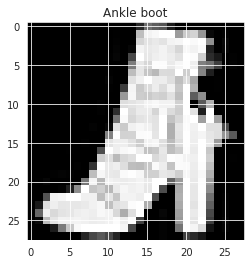

In [ ]:
idx = 11
img_array = train_images[idx]
img_label = class_names[train_labels[idx]]

plt.imshow(img_array, cmap='gray')
plt.title(img_label);

In [ ]:
# Feature engineering
train_images = train_images.reshape(len(train_images), -1)
test_images = test_images.reshape(len(test_images), -1)

print(train_images.shape)

(60000, 784)


In [ ]:
# Modeling
img_svc = SVC(max_iter=10)
img_svc.fit(train_images, train_labels)
y_pred = img_svc.predict(test_images)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [ ]:
# Performace evaluation
print(metrics.classification_report(test_labels, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.20      0.78      0.32      1000
     Trouser       0.95      0.81      0.87      1000
    Pullover       0.29      0.29      0.29      1000
       Dress       0.76      0.37      0.50      1000
        Coat       0.58      0.01      0.03      1000
      Sandal       0.37      0.37      0.37      1000
       Shirt       0.33      0.12      0.17      1000
     Sneaker       0.60      0.76      0.67      1000
         Bag       0.31      0.09      0.13      1000
  Ankle boot       0.56      0.46      0.51      1000

    accuracy                           0.41     10000
   macro avg       0.49      0.41      0.39     10000
weighted avg       0.49      0.41      0.39     10000

